# Mô Tả Bộ Dữ Liệu

Đây là bảng mô tả chi tiết các trường dữ liệu (cột) trong bộ dữ liệu sức khỏe, được phân loại theo từng nhóm thông tin.

---

## Nhóm I: Thông Tin Bệnh Nhân & Tình Trạng Chung

| Trường Dữ Liệu | Mô Tả Tiếng Việt | Đơn Vị/Giá Trị |
| :--- | :--- | :--- |
| **Age** | **Tuổi** của bệnh nhân. | Năm (years) |
| **Gender** | **Giới tính** của bệnh nhân. | Nam (Male) / Nữ (Female) |
| **Medical Condition** | **Tình trạng bệnh lý** được báo cáo. | Ví dụ: Tiểu đường (Diabetes), Tăng huyết áp (Hypertension), Hen suyễn (Asthma), Béo phì (Obesity), Khỏe mạnh (Healthy) |
| **LengthOfStay** | **Thời gian Nằm viện**. | Ngày (days) |

---

## Nhóm II: Chỉ Số Sức Khỏe Sinh Hóa

| Trường Dữ Liệu | Mô Tả Tiếng Việt | Đơn Vị/Chỉ số |
| :--- | :--- | :--- |
| **Glucose** | Mức **Đường huyết** (Glucose). | (Chưa xác định đơn vị) |
| **Blood Pressure** | Mức **Huyết áp**. | (Chưa xác định đơn vị, e.g., mmHg) |
| **BMI** | **Chỉ số Khối cơ thể** (Body Mass Index). | (kg/m²) |
| **Oxygen Saturation** | Mức **Độ bão hòa oxy** trong máu. | Phần trăm (%) |
| **Cholesterol** | Mức **Cholesterol** tổng. | (Chưa xác định đơn vị) |
| **Triglycerides** | Mức **Triglyceride** (Mỡ máu). | (Chưa xác định đơn vị) |
| **HbA1c** | **Hemoglobin A1c** (Đường huyết trung bình 3 tháng). | Phần trăm (%) |

---

## Nhóm III: Lối Sống & Yếu Tố Nguy Cơ

| Trường Dữ Liệu | Mô Tả Tiếng Việt | Phân loại |
| :--- | :--- | :--- |
| **Smoking** | **Tình trạng Hút thuốc**. | **0** = Không hút thuốc, **1** = Hút thuốc |
| **Alcohol** | Mức độ **Tiêu thụ Rượu/Bia**. | **0** = Không, **1** = Có |
| **Physical Activity** | **Hoạt động Thể chất** (ước tính số giờ/tuần). | Giờ/Tuần |
| **Diet Score** | **Điểm Chất lượng Chế độ ăn uống**. | Thang điểm số (numeric) |
| **Family History** | **Tiền sử Bệnh lý Gia đình**. | **0** = Không, **1** = Có |
| **Stress Level** | **Mức độ Căng thẳng** (Stress). | Thang điểm số (numeric) |
| **Sleep Hours** | **Số giờ Ngủ trung bình** mỗi ngày. | Giờ/Ngày |

---

## Nhóm IV: Cột Dữ Liệu Bổ Sung

| Trường Dữ Liệu | Mô Tả Tiếng Việt | Nội dung |
| :--- | :--- | :--- |
| **random_notes** | **Ghi chú ngẫu nhiên** (văn bản giữ chỗ). | Văn bản (e.g., lorem / ipsum / ###) |
| **noise_col** | Cột **Giá trị nhiễu** (không liên quan). | Giá trị ngẫu nhiên |

# Thiết kế lớp đối tượng thực hiện EDA

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy.stats import norm
from scipy.stats import ks_2samp, chi2_contingency

# NHÓM 1: KHỞI TẠO BAN ĐẦU VÀ CÁC KHÁM PHÁ CƠ BẢN TRÊN DATAFRAME
class EDA:
    """
    Lớp hỗ trợ các bước EDA (Exploratory Data Analysis) cơ bản:
    - Khởi tạo từ file CSV hoặc từ DataFrame có sẵn.
    - Hiển thị dataframe, thông tin, kích thước.

    Cách dùng nhanh:
    ----------------
    # Cách 1: Khởi tạo từ file CSV
    eda = EDA(file_path="data.csv")

    # Cách 2: Khởi tạo từ DataFrame có sẵn
    eda = EDA(df=your_dataframe)

    # Các hàm:
    eda.display_dataframe()
    eda.display_info()
    eda.display_shape()
    """

    def __init__(self, file_path: str = None, df: pd.DataFrame = None):
        """
        Khởi tạo đối tượng EDA.

        Tham số:
            file_path (str): Đường dẫn CSV. Nếu dùng, không truyền df.
            df (pd.DataFrame): DataFrame có sẵn. Nếu dùng, không truyền file_path.

        Ngoại lệ:
            ValueError: Khi truyền cả hai hoặc không truyền cái nào.
        """

        if file_path is None and df is None:
            raise ValueError("Cần chọn 'file_path' hoặc 'df'.")
        if file_path is not None and df is not None:
            raise ValueError("Không được chọn đồng thời cả 'file_path' và 'df'.")

        if file_path is not None:
            self.df: pd.DataFrame = pd.read_csv(file_path)
        else:
            self.df: pd.DataFrame = df

    def display_dataframe(self) -> None:
        """In toàn bộ DataFrame."""
        print("\n--- DataFrame ---")
        self.df

    def display_info(self) -> None:
        """In thông tin tổng quát."""
        print("\n--- Thông tin của dataframe: ---\n")
        self.df.info()

    def display_shape(self) -> None:
        """In kích thước DataFrame dạng (số dòng, số cột)."""
        print("\n--- Kích thước của dataframe ---")
        print(self.df.shape)



In [ ]:
# NHÓM 2: DỮ LIỆU TRÙNG LẶP VÀ DỮ LIỆU TRỐNG
class DuplicateAndNullAnalyzer(EDA):
    """
    Lớp mở rộng từ EDA, thêm các chức năng:
    duplicate_check(): kiểm tra trùng lặp
    missing_check(): kiểm tra dữ liệu thiếu
    all_empty(): kiểm tra tính trống đồng bộ của dữ liệu
    noise_analyze(): phân tích các cột gây nhiễu
    null_analyze(): phân tích dữ liệu trống

    Cách dùng: Truyền vào dataframe gốc và sử dụng các phương thức nội bộ để khám phá
    """

    def __init__(self, df: pd.DataFrame):
        """Khởi tạo lớp từ một DataFrame."""
        super().__init__(df=df)

    # ---------------------------------------------
    def duplicate_check(self) -> None:
        """
        Kiểm tra dữ liệu trùng lặp trong toàn bộ DataFrame.
        In số lượng và hiển thị các dòng bị trùng.
        """
        print("\n--- Kiểm tra dữ liệu trùng lặp ---")
        duplicated = self.df.duplicated().sum()
        print(f"Tổng số hàng trùng lặp: {duplicated}")

        if duplicated > 0:
            print("\n--- Các dòng trùng lặp: ---")
            display(self.df[self.df.duplicated(keep=False)])

    # ---------------------------------------------
    def missing_check(self) -> None:
        """
        Kiểm tra số lượng giá trị thiếu theo từng cột.
        """
        print("\n--- Kiểm tra dữ liệu thiếu ---")
        null_by_cols = self.df.isnull().sum()
        print(null_by_cols)

    # ---------------------------------------------
    def all_empty(self, cols_to_check: list[str]) -> None:
        """
        Kiểm tra xem có dòng nào trống đồng bộ trên một nhóm cột hay không.

        Args:
            cols_to_check (list[str]): Danh sách các cột cần kiểm tra.
        """
        print(f"\n--- Kiểm tra trống đồng bộ trên: {', '.join(cols_to_check)} ---")

        condition = pd.Series([True] * len(self.df), index=self.df.index)

        for col in cols_to_check:
            if col in self.df.columns:
                condition &= self.df[col].isna()
            else:
                print(f"Cảnh báo: '{col}' không tồn tại. Bỏ qua cột này.")

        empty_sync_rows = self.df[condition]

        if not empty_sync_rows.empty:
            print(f"Tìm thấy {empty_sync_rows.shape[0]} dòng trống đồng bộ:")
            display(empty_sync_rows)
        else:
            print("Không có dòng trống đồng bộ.")

    # ---------------------------------------------
    def noise_analyze(self) -> None:
        """
        Phân tích các cột nhiễu:
        - random_notes: giá trị xuất hiện.
        - noise_col: histogram + KDE + đường chuẩn.
        """
        print("\n--- Bắt đầu phân tích dữ liệu nhiễu ---")

        initial_empty_df = self.df[self.df.isna().any(axis=1)].copy()

        # random_notes (vẽ phân phối)
        print("\n--- Phân tích random_notes ---")
        if "random_notes" in initial_empty_df:
            print(initial_empty_df["random_notes"].value_counts())
        else:
            print("Không có cột random_notes.")

        # noise_col (vẽ phân phối)
        print("\n--- Phân tích noise_col ---")
        if "noise_col" in initial_empty_df:
            col = initial_empty_df["noise_col"]
            mu, sigma = col.mean(), col.std()

            x = np.linspace(col.min(), col.max(), 100)
            pdf_normal = norm.pdf(x, mu, sigma)

            plt.figure(figsize=(10, 6))
            col.hist(bins=30, density=True, alpha=0.6, label="Histogram")
            sns.kdeplot(col, linewidth=2, label="KDE")
            plt.plot(x, pdf_normal, "r--", label="Chuẩn")

            plt.title("Phân phối noise_col")
            plt.legend()
            plt.grid(True, alpha=0.4)
            plt.show()
        else:
            print("Không có cột noise_col.")

    # ---------------------------------------------
    def null_analyze(self, cols: list[str] = None) -> None:
        """
        Phân tích tác động của giá trị thiếu trên từng cột:
        - So sánh mean/median/variance của nhóm không thiếu với nhóm chỉ thiếu đúng 1 cột.
        - So sánh phân phối categorical.

        Args:
            cols (list[str], optional):
                Danh sách cột để phân tích.
                Nếu None → tự động chọn các cột có NA.
        """
        print("\n=== PHÂN TÍCH GIÁ TRỊ THIẾU ===")

        if cols is None:
            cols = self.df.columns[self.df.isna().any()].tolist()
            print(f"Tự động chọn: {cols}")
        else:
            print(f"Phân tích: {cols}")

        df_no_na = self.df.dropna().copy()

        # Các cột số
        numeric_cols = [
            c for c in self.df.select_dtypes(include=np.number).columns
            if c not in ["noise_col", "random_notes"]
        ]

        for col in cols:
            print(f"\n--- Cột: {col} ---")

            if col not in self.df:
                print(f"'{col}' không tồn tại.")
                continue

            rows_with_na = self.df[self.df[col].isna()]
            other_cols = [c for c in self.df.columns if c != col]

            # Hàng chỉ thiếu ở đúng 1 cột đang xét
            exclude_one_col_df = rows_with_na[
                rows_with_na[other_cols].notna().all(axis=1)
            ]

            print(f"Số hàng chỉ thiếu '{col}': {exclude_one_col_df.shape[0]}")

            if exclude_one_col_df.empty:
                continue

            # Các cột có ở dataset chứa null và không chứa null
            common_numeric = list(
                set(numeric_cols)
                & set(exclude_one_col_df.columns)
                & set(df_no_na.columns)
            )

            if common_numeric:
                print("\nSai số tương đối (mean/median/var):")
                stats_no_na = df_no_na[common_numeric].agg(["mean", "median", "var"])
                stats_missing = exclude_one_col_df[common_numeric].agg(["mean", "median", "var"])
                print((stats_missing - stats_no_na) / stats_no_na)


            # categorical
            def compare(cat):
                if cat in exclude_one_col_df and cat in df_no_na:
                    print(f"\nPhân phối '{cat}' (nhóm thiếu {col}):")
                    print(exclude_one_col_df[cat].value_counts(normalize=True))

                    print(f"\nPhân phối '{cat}' (nhóm đầy đủ):")
                    print(df_no_na[cat].value_counts(normalize=True))

            for c in ["Gender", "Medical Condition"]:
                if c != col:
                    compare(c)
                else:
                    compare(col)



In [ ]:
class DistributionAnalyzer(EDA):
    """
    Lớp phân tích phân phối dữ liệu, kế thừa từ EDA, thêm các chức năng:

    describe_numerical_data(): thống kê mô tả dữ liệu số
    plot_numerical_density(): vẽ biểu đồ mật độ
    plot_numerical_boxplot(): vẽ boxplot cho dữ liệu số
    describe_categorical_data(): thống kê phân phối biến phân loại
    plot_categorical_distribution(): trực quan hóa biến phân loại
    plot_binary_distribution(): biểu đồ phân phối biến nhị phân
    find_outliers(): tìm giá trị ngoại lai theo IQR
    analyze_outlier_impact(): phân tích ảnh hưởng của outlier
    min_max_values(): xem giá trị nhỏ nhất và lớn nhất
    check_negative_values(): kiểm tra giá trị âm

    Cách dùng: Truyền vào dataframe gốc và sử dụng các phương thức nội bộ để phân tích phân phối,
    trực quan hóa dữ liệu số/phân loại, đánh giá giá trị ngoại lai, và kiểm tra tính hợp lệ của dữ liệu.

    """

    def __init__(self, df: pd.DataFrame) -> None:
        """
        Khởi tạo với một DataFrame đã có.

        Args:
            df (pd.DataFrame): DataFrame đầu vào cần phân tích.
        """
        super().__init__(df=df)

    # ---------------------- DỮ LIỆU SỐ ----------------------
    def describe_numerical_data(self) -> None:
        """
        In thống kê mô tả cơ bản cho các cột dữ liệu số.
        """
        print("\n--- Thống kê mô tả cho dữ liệu số ---")
        print(self.df.describe())

    def plot_numerical_density(self) -> None:
        """
        Vẽ biểu đồ mật độ (density plot) cho tất cả các cột dạng số.
        """
        print("\n--- Biểu đồ mật độ ---")
        numerical_cols = self.df.select_dtypes(include=np.number).columns
        num_plots = len(numerical_cols)
        fig_rows = int(np.ceil(num_plots / 3))

        self.df.select_dtypes('number').plot(
            kind='density',
            figsize=(20, fig_rows * 6),
            subplots=True,
            layout=(fig_rows, 3),
            title="Density plot of Numerical features",
            sharex=False
        )
        plt.tight_layout()
        plt.show()

    def plot_numerical_boxplot(self) -> None:
        """
        Vẽ boxplot cho các cột dạng số để quan sát phân phối và ngoại lai.

        Lưu ý:
            - Tự động tổ chức subplot 3 cột mỗi hàng.
        """
        print("\n--- Boxplot ---")
        numerical_cols = self.df.select_dtypes(include=np.number).columns
        num_plots = len(numerical_cols)
        fig_rows = int(np.ceil(num_plots / 3))

        self.df.select_dtypes('number').plot(
            kind='box',
            figsize=(16, fig_rows * 5),
            subplots=True,
            layout=(fig_rows, 3),
            title="Box plot of Numerical features",
            sharex=False
        )
        plt.tight_layout()
        plt.show()

    # ---------------------- DỮ LIỆU PHÂN LOẠI ----------------------
    def describe_categorical_data(self) -> None:
        """
        Thống kê mô tả cho các biến phân loại (object).

        In ra tần suất (frequency) và tỷ lệ (%).
        """
        print("\n--- Thống kê biến phân loại ---")
        categorical_cols = self.df.select_dtypes(include='object').columns

        for col in categorical_cols:
            print(f"\nPhân phối của {col}:")
            print(self.df[col].value_counts(dropna=False, normalize=True))

    def plot_categorical_distribution(self) -> None:
        """
        Vẽ biểu đồ phân phối (countplot) cho các cột dạng phân loại.

        Lưu ý:
            - Tự động chia subplot 3 cột.
            - Xoay nhãn trục X cho dễ nhìn.
        """
        print("\n--- Phân phối cho biến phân loại ---")
        categorical_cols = self.df.select_dtypes(include='object').columns

        if len(categorical_cols) == 0:
            print("Không có biến phân loại.")
            return

        num_plots = len(categorical_cols)
        fig_rows = int(np.ceil(num_plots / 3))

        plt.figure(figsize=(16, fig_rows * 5))
        for i, col in enumerate(categorical_cols):
            plt.subplot(fig_rows, 3, i + 1)
            sns.countplot(x=col, data=self.df, palette='viridis')
            plt.title(f'Phân phối của {col}')
            plt.xlabel(col)
            plt.ylabel('Count')
            plt.xticks(rotation=45, ha='right')

        plt.tight_layout()
        plt.show()

    # ---------------------- NHỊ PHÂN ----------------------
    def plot_binary_distribution(self, binary_cols: list[str]) -> None:
        """
        Vẽ biểu đồ countplot cho các biến nhị phân (giá trị 0/1).

        Args:
            binary_cols (list[str]): Danh sách các cột nhị phân.
        """
        print("\n--- Phân phối cho biến nhị phân ---")

        if not binary_cols:
            print("Không có biến nhị phân.")
            return

        num_plots = len(binary_cols)
        fig_rows = int(np.ceil(num_plots / 3))

        plt.figure(figsize=(15, fig_rows * 5))
        for i, col in enumerate(binary_cols):
            if col in self.df.columns:
                plt.subplot(fig_rows, 3, i + 1)
                sns.countplot(x=col, data=self.df, palette='viridis')
                plt.title(f'Phân bố của {col}')
                plt.xlabel(col)
                plt.ylabel('Số lượng')
                plt.xticks([0, 1], ['Không', 'Có'])
            else:
                print(f"Không có cột '{col}'.")

        plt.tight_layout()
        plt.show()

    # ---------------------- NGOẠI LAI ----------------------
    def find_outliers(self, col_name: str) -> pd.DataFrame:
        """
        Tìm các giá trị ngoại lai theo phương pháp IQR.

        Args:
            col_name (str): Tên cột cần tìm ngoại lai.

        Returns:
            pd.DataFrame: Các bản ghi chứa ngoại lai.
        """
        q1 = self.df[col_name].quantile(0.25)
        q3 = self.df[col_name].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

        return self.df[
            (self.df[col_name] < lower_bound) |
            (self.df[col_name] > upper_bound)
        ]

    def analyze_outlier_impact(
        self,
        numerical_col: str,
        categorical_col: str = 'Medical Condition',
        return_outliers: bool = False
    ) -> pd.DataFrame | None:
        """
        Phân tích mối quan hệ giữa ngoại lai của biến số và một biến phân loại.

        Args:
            numerical_col (str): Tên cột số cần xem ngoại lai.
            categorical_col (str): Biến phân loại để so sánh.
            return_outliers (bool): Trả về DataFrame ngoại lai nếu True.

        Returns:
            pd.DataFrame | None: DataFrame ngoại lai (tùy chọn).
        """
        print(f"\n--- Phân tích giá trị ngoại lai cho {numerical_col} và quan hệ với {categorical_col} ---")

        if numerical_col not in self.df.columns:
            print(f"Error: Không tìm thấy '{numerical_col}'.")
            return
        if categorical_col not in self.df.columns:
            print(f"Error: Không tìm thấy '{categorical_col}'.")
            return

        outliers_df = self.find_outliers(numerical_col)

        if not outliers_df.empty:
            print(f"Số giá trị '{categorical_col}' trong nhóm ngoại lai:")
            print(outliers_df[categorical_col].value_counts(dropna=False))

            print(f"\nMin ngoại lai của {numerical_col}: {outliers_df[numerical_col].min()}")
            print(f"Max ngoại lai của {numerical_col}: {outliers_df[numerical_col].max()}")
        else:
            print(f"Không có ngoại lai cho '{numerical_col}'.")

        return outliers_df if return_outliers else None

    # ---------------------- GIÁ TRỊ CỰC TRỊ ----------------------
    def min_max_values(self, numerical_col: str, n: int = 50) -> None:
        """
        In ra n giá trị nhỏ nhất và lớn nhất của một cột.

        Args:
            numerical_col (str): Cột dạng số.
            n (int): Số lượng giá trị muốn xem.
        """
        print('\nIn top giá trị thấp và cao nhất:')
        print(self.df[numerical_col].dropna().sort_values().head(n).values)
        print(self.df[numerical_col].dropna().sort_values().tail(n).values)

    # ---------------------- GIÁ TRỊ ÂM ----------------------
    def check_negative_values(self, cols_to_check: list[str]) -> None:
        """
        Kiểm tra các cột xem có xuất hiện giá trị âm hay không.

        Args:
            cols_to_check (list[str]): Danh sách các cột dạng số cần kiểm tra.
        """
        print("\n--- Kiểm tra giá trị âm ---")
        for col in cols_to_check:
            if col in self.df.columns and self.df[col].dtype in ['float64', 'int64']:
                negative_values = self.df[self.df[col] < 0]

                if not negative_values.empty:
                    print(f"Giá trị âm trong '{col}': {negative_values[col].unique()}")
                    print(f"Số lượng: {len(negative_values)}")
                else:
                    print(f"Không có giá trị âm trong '{col}'.")
            else:
                print(f"Column '{col}' not found hoặc không phải dạng số.")


In [ ]:
# NHÓM 4: PHÂN TÍCH TƯƠNG QUAN
class CorrelationAnalyzer(EDA):
    """
    Lớp mở rộng từ EDA, thêm các chức năng:
        - plot_correlation_matrix(): vẽ heatmap ma trận tương quan giữa các biến số
        - plot_target_correlation_heatmap(): vẽ heatmap tương quan giữa các biến và biến mục tiêu đã mã hóa
        - analyze_target_correlation(): phân tích tương quan với biến mục tiêu

    Cách dùng: Truyền vào dataframe gốc và sử dụng các phương thức nội bộ để phân tích
               mối quan hệ giữa các biến, trực quan hóa tương quan tổng thể và tương quan với biến mục tiêu.
    """

    def __init__(self, df: pd.DataFrame):
        """
        Khởi tạo lớp CorrelationAnalyzer.

        Tham số:
            df (pd.DataFrame): DataFrame cần phân tích tương quan.
        """
        super().__init__(df=df)

    def plot_correlation_matrix(self) -> None:
        """
        Vẽ heatmap ma trận tương quan giữa tất cả các biến số trong DataFrame.

        - Tự động loại bỏ các giá trị NULL.
        - Chỉ tính trên các biến dạng số (numeric).
        - Kết quả là một heatmap trực quan.

        Trả về:
            None
        """
        print("\n--- Ma trận tương quan và heatmap ---")
        correlation_matrix = self.df.dropna().select_dtypes(include=np.number).corr()
        plt.figure(figsize=(18, 15))
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
        plt.title('Ma trận tương quan giữa các biến số', fontsize=16)
        plt.show()

    def plot_target_correlation_heatmap(self, correlations: pd.Series, target_col: str) -> None:
        """
        Vẽ heatmap tương quan giữa các đặc trưng và biến mục tiêu đã mã hóa.

        Tham số:
            correlations (pd.Series): Các hệ số tương quan đã tính.
            target_col (str): Tên cột mục tiêu đã được mã hóa.

        Trả về:
            None
        """
        print(f"\n--- Heatmap Tương quan với '{target_col}' đã mã hóa ---")

        corr_df = correlations.to_frame(name=target_col)

        plt.figure(figsize=(4, len(corr_df) * 0.7))
        sns.heatmap(corr_df, annot=True, cmap='coolwarm', fmt='.3f', linewidths=.5, cbar=False)
        plt.title(f'Correlation with {target_col}', fontsize=12)
        plt.yticks(rotation=0)
        plt.tight_layout()
        plt.show()

    def analyze_target_correlation(
        self,
        target_col: str = 'Medical Condition',
        numerical_cols: list[str] | None = None
    ) -> None:
        """
        Phân tích tương quan giữa các biến số và biến mục tiêu.

        Quy trình:
            - Sao chép dataframe để tránh thay đổi dữ liệu gốc.
            - Điền NA cho: Age, Gender, Glucose, Blood Pressure.
            - Loại bỏ mọi hàng còn NA.
            - LabelEncoding biến mục tiêu nếu là dạng object.
            - Tính toán hệ số tương quan giữa các biến số và biến mục tiêu đã mã hóa.
            - Gọi heatmap hiển thị mức độ tương quan.

        Tham số:
            target_col (str): Cột mục tiêu để phân tích.
            numerical_cols (list[str] | None):
                Danh sách tên cột số để phân tích.
                Nếu None → tự động lấy toàn bộ biến số.

        Trả về:
            None
        """
        print(f"\n--- Phân tích tương quan với biến mục tiêu: '{target_col}' ---")
        df_copy = self.df.copy()

        # Điền giá trị thiếu
        if 'Age' in df_copy.columns:
            df_copy['Age'] = df_copy['Age'].fillna(df_copy['Age'].median())

        if 'Gender' in df_copy.columns:
            random_gender_choice = np.random.choice(['Male', 'Female'])
            df_copy['Gender'] = df_copy['Gender'].fillna(random_gender_choice)

        if 'Glucose' in df_copy.columns:
            df_copy['Glucose'] = df_copy['Glucose'].fillna(df_copy['Glucose'].median())

        if 'Blood Pressure' in df_copy.columns:
            df_copy['Blood Pressure'] = df_copy['Blood Pressure'].fillna(df_copy['Blood Pressure'].median())

        # Loại bỏ phần còn NA
        df_copy.dropna(inplace=True)

        # Label Encoding biến mục tiêu
        encoded_target_col = target_col + ' Encoded'
        if target_col in df_copy.columns and df_copy[target_col].dtype == 'object':
            le = LabelEncoder()
            df_copy[encoded_target_col] = le.fit_transform(df_copy[target_col])
        else:
            print(f"Cột mục tiêu '{target_col}' không phải dạng object hoặc không tồn tại. Bỏ qua Label Encoding.")
            return

        # Lấy danh sách biến số
        if numerical_cols is None:
            numerical_features = df_copy.select_dtypes(include=np.number).columns.tolist()
            if encoded_target_col in numerical_features:
                numerical_features.remove(encoded_target_col)
        else:
            numerical_features = [col for col in numerical_cols if col in df_copy.columns and col != encoded_target_col]

        # Tính tương quan
        correlations = df_copy[numerical_features + [encoded_target_col]].corr()[encoded_target_col].drop(encoded_target_col)

        # Vẽ heatmap
        self.plot_target_correlation_heatmap(correlations.sort_values(ascending=False), encoded_target_col)


In [ ]:
# NHÓM 5: KIỂM ĐỊNH PHÂN PHỐI
class DistributionComparison:
    """
    Lớp có chức năng kiểm tra phân phối giữa 2 nhóm seen_data và unseen_data theo từng cột (đặc trưng số hoặc phân loại)

    Cách dùng: Truyền vào 2 dataframe cần kiểm định (hoặc đường dẫn) và gọi hàm kiểm định
    """
    def __init__(self, seen_csv: str = None, unseen_csv: str = None, seen_df: pd.DataFrame = None, unseen_df: pd.DataFrame = None) -> None:
        """
        Khởi tạo với 2 file CSV hoặc dataframe.

        Args:
            seen_df (pd.DataFrame): đối tượng dataframe truyền vào
            unseen_df (pd.DataFrame): đối tượng dataframe truyền vào
            seen_csv (str): đường dẫn file CSV chứa 85% dữ liệu (có nhãn).
            unseen_csv (str): đường dẫn file CSV chứa 15% dữ liệu (thiếu nhãn).
        """
        if seen_df is not None:
          self.seen_data = seen_df
        else:
          seen_data = pd.read_csv(seen_csv)
          self.seen_data = seen_data

        if unseen_df is not None:
          self.unseen_data = unseen_df
        else:
          unseen_data = pd.read_csv(unseen_csv)
          self.unseen_data = unseen_data

    @property
    def return_seen(self) -> pd.DataFrame:
      """ Trả về dataframe có sẵn"""
      return self.seen_data

    @property
    def return_unseen(self) -> pd.DataFrame:
      """Trả về tập dữ liệu mô phỏng"""
      return self.unseen_data

    # So sánh phân phối hai mẫu dữ liệu (seen_data vs unseen_data)
    def compare_distributions(self, numeric_cols, categorical_cols) -> pd.DataFrame:
        """
        Kiểm định và so sánh phân phối giữa 2 dataframe.
        :param numeric_cols: List tên các cột số
        :param categorical_cols: List tên các cột phân loại
        :return: DataFrame tổng hợp kết quả kiểm định
        Các phương pháp thống kê sử dụng:
          1. Biến số (Numerical): Kiểm định Kolmogorov-Smirnov (KS Test)
            - H0: Không có sự khác biệt về phân phối giữa 2 mẫu.
            - H1: Có sự khác biệt có ý nghĩa thống kê về phân phối giữa 2 mẫu
          2. Biến phân loại (Categorical): Kiểm định Chi-Square
            - H0: Không có sự khác biệt về phân phối tần suất giữa 2 mẫu.
            - H1: Có sự khác biệt có ý nghĩa thống kê về phân phối tần suất giữa 2 mẫu.
        """
        results = []

        print(f"--- BẮT ĐẦU KIỂM ĐỊNH PHÂN PHỐI ---")
        print(f"Số lượng mẫu có sẵn (để huấn luyện và đánh giá): {len(self.seen_data)}")
        print(f"Số lượng mẫu Missing: {len(self.unseen_data)}\n")

        # Kiểm phân phối cho biến số (KS test)
        for col in numeric_cols:
            # Lấy dữ liệu và loại bỏ NaN để tránh lỗi
            data1 = self.seen_data[col].dropna()
            data2 = self.unseen_data[col].dropna()

            # Thực hiện KS Test
            stat, p_value = ks_2samp(data1, data2)

            # Đánh giá
            conclusion = "Giống nhau" if p_value > 0.05 else "Khác nhau"
            results.append({
                'Feature': col,
                'Type': 'Numerical',
                'Test': 'KS Test',
                'P-Value': round(p_value, 4),
                'Conclusion (alpha=0.05)': conclusion
            })

            # Vẽ biểu đồ mật độ (KDE Plot)
            plt.figure(figsize=(8, 4))
            sns.kdeplot(data1, label='df_85 (Seen)', fill=True, alpha=0.3, color='blue')
            sns.kdeplot(data2, label='df_15 (Unseen)', fill=True, alpha=0.3, color='orange')
            plt.title(f'Phân phối biến số: {col} (p={p_value:.4f})')
            plt.legend()
            plt.show()

        # Kiểm định phân phối cho biến phân loại (Chi-square test)
        for col in categorical_cols:
            # Tạo bảng tần suất (tỷ lệ)
            prop_seen = self.seen_data[col].value_counts(normalize=True).sort_index()
            prop_unseen = self.unseen_data[col].value_counts(normalize=True).sort_index()

            # Ghép 2 df để tạo Contingency Table
            tmp1 = pd.DataFrame({col: self.seen_data[col], 'Group': 'Train'})
            tmp2 = pd.DataFrame({col: self.unseen_data[col], 'Group': 'Missing'})
            combined = pd.concat([tmp1, tmp2])

            contingency_table = pd.crosstab(combined[col], combined['Group'])

            # Chi-Square test
            stat, p_value, dof, expected = chi2_contingency(contingency_table)

            # Đánh giá
            conclusion = "Giống nhau" if p_value > 0.05 else "Khác nhau"
            results.append({
                'Feature': col,
                'Type': 'Categorical',
                'Test': 'Chi-Square',
                'P-Value': round(p_value, 4),
                'Conclusion (alpha=0.05)': conclusion
            })

            # Vẽ biểu đồ cột so sánh tỷ lệ
            plt.figure(figsize=(8, 4))
            df_plot = pd.DataFrame({'Train': prop_seen, 'Missing': prop_unseen})
            df_plot.plot(kind='bar', color=['blue', 'orange'], alpha=0.7, ax=plt.gca())
            plt.title(f'Tỷ lệ biến phân loại: {col} (p={p_value:.4f})')
            plt.ylabel('Tỷ lệ (%)')
            plt.xticks(rotation=0)
            plt.legend()
            plt.show()

        print("\n===== HOÀN TẤT KIỂM ĐỊNH =====\n")
        return pd.DataFrame(results)


# Thu thập dữ liệu

In [ ]:
file_path = 'dirty_v3_path.csv'
eda_analyzer = EDA(file_path)
distribution_analyzer = DistributionAnalyzer(eda_analyzer.df)
duplicate_and_null_analyzer = DuplicateAndNullAnalyzer(eda_analyzer.df)
correlation_analyzer = CorrelationAnalyzer(eda_analyzer.df)



In [ ]:
# Hiển thị một số dòng đầu
eda_analyzer.df.head()


,Age,Gender,Medical Condition,Glucose,Blood Pressure,BMI,Oxygen Saturation,LengthOfStay,Cholesterol,Triglycerides,HbA1c,Smoking,Alcohol,Physical Activity,Diet Score,Family History,Stress Level,Sleep Hours,random_notes,noise_col
0,46.0,Male,Diabetes,137.04,135.27,28.90,96.04,6,231.88,210.56,7.61,0,0,-0.20,3.54,0,5.07,6.05,lorem,-137.057211
1,22.0,Male,Healthy,71.58,113.27,26.29,97.54,2,165.57,129.41,4.91,0,0,8.12,5.90,0,5.87,7.72,ipsum,-11.230610
2,50.0,NaN,Asthma,95.24,NaN,22.53,90.31,2,214.94,165.35,5.60,0,0,5.01,4.65,1,3.09,4.82,ipsum,98.331195
3,57.0,NaN,Obesity,NaN,130.53,38.47,96.60,5,197.71,182.13,6.92,0,0,3.16,3.37,0,3.01,5.33,lorem,44.187175
4,66.0,Female,Hypertension,95.15,178.17,31.12,94.90,4,259.53,115.85,5.98,0,1,3.56,3.40,0,6.38,6.64,lorem,44.831426


# Tổng quan

In [ ]:
# Kích thước của dataframe
eda_analyzer.display_shape()


--- Kích thước của dataframe ---
(30000, 20)


In [ ]:
# Thông tin của dataframe
eda_analyzer.display_info()


--- Thông tin của dataframe: ---

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                25500 non-null  float64
 1   Gender             25500 non-null  object 
 2   Medical Condition  25500 non-null  object 
 3   Glucose            25500 non-null  float64
 4   Blood Pressure     25500 non-null  float64
 5   BMI                30000 non-null  float64
 6   Oxygen Saturation  30000 non-null  float64
 7   LengthOfStay       30000 non-null  int64  
 8   Cholesterol        30000 non-null  float64
 9   Triglycerides      30000 non-null  float64
 10  HbA1c              30000 non-null  float64
 11  Smoking            30000 non-null  int64  
 12  Alcohol            30000 non-null  int64  
 13  Physical Activity  30000 non-null  float64
 14  Diet Score         30000 non-null  float64
 15  Family History     30000 non-null  

Nhận xét: Tồn tại các dữ liệu trống (null) trong bộ dữ liệu.

# Dữ liệu trùng lặp

In [ ]:
duplicate_and_null_analyzer.duplicate_check()


--- Kiểm tra dữ liệu trùng lặp ---
Tổng số hàng trùng lặp: 0


Như vậy dữ liệu không tồn tại các dòng trùng lặp

# Dữ liệu trống

In [ ]:
duplicate_and_null_analyzer.missing_check()


--- Kiểm tra dữ liệu thiếu ---
Age                  4500
Gender               4500
Medical Condition    4500
Glucose              4500
Blood Pressure       4500
BMI                     0
Oxygen Saturation       0
LengthOfStay            0
Cholesterol             0
Triglycerides           0
HbA1c                   0
Smoking                 0
Alcohol                 0
Physical Activity       0
Diet Score              0
Family History          0
Stress Level            0
Sleep Hours             0
random_notes            0
noise_col               0
dtype: int64


Nhận xét: Dữ liệu trống tập trung ở các cột đầu tiên và có vẻ tương tự về số dòng -> Kiểm tra xem dữ liệu trống ở các dòng có xuất hiện theo quy luật hay không

In [ ]:
cols_with_missing = ['Age', 'Gender', 'Glucose', 'Blood Pressure', 'Medical Condition']
duplicate_and_null_analyzer.all_empty(cols_with_missing)


--- Kiểm tra trống đồng bộ trên: Age, Gender, Glucose, Blood Pressure, Medical Condition ---
Tìm thấy 2 dòng trống đồng bộ:


,Age,Gender,Medical Condition,Glucose,Blood Pressure,BMI,Oxygen Saturation,LengthOfStay,Cholesterol,Triglycerides,HbA1c,Smoking,Alcohol,Physical Activity,Diet Score,Family History,Stress Level,Sleep Hours,random_notes,noise_col
11353,NaN,NaN,NaN,NaN,NaN,41.28,95.50,4,244.06,201.61,5.81,0,0,2.74,5.70,1,5.31,6.07,ipsum,-78.968913
20475,NaN,NaN,NaN,NaN,NaN,36.40,95.14,4,190.76,195.60,5.32,0,1,3.57,2.26,0,4.02,8.57,??,67.157982


Do chỉ có 2 dòng có dữ liệu trống đồng bộ nên chưa thể xác định được xu hướng.

## Các cột nhiễu


--- Bắt đầu phân tích dữ liệu nhiễu ---

--- Phân tích random_notes ---
random_notes
###      4173
??       4169
ipsum    4153
lorem    4150
Name: count, dtype: int64

--- Phân tích noise_col ---


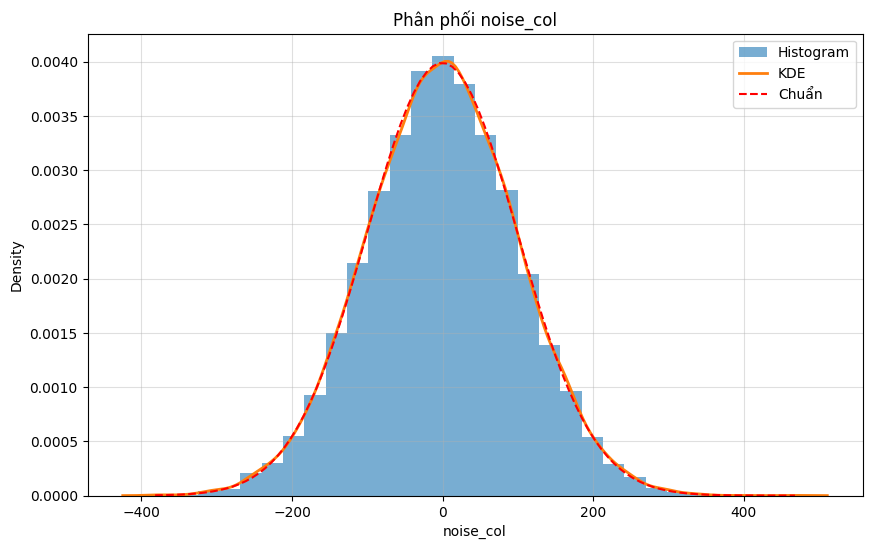

In [ ]:
duplicate_and_null_analyzer.noise_analyze()

Như vậy dữ liệu trong noise gần như phân phối chuẩn, không có nét đặc biệt. Tương tự random_notes cũng có phân phối đều nhau, không có xu hướng đặc biệt
-> Loại bỏ các cột này do không khám phá được bất thường

## Kiểm tra phân phối giữa nhóm có N/A và nhóm không có N/A

So sánh phân phối giữa nhóm có N/A ở một cột cụ thể và nhóm không có N/A để kiểm tra liệu có sự khác biệt về phân phối giữa hai nhóm

Lưu ý, do cô lập từng cột nên phải giả định dữ liệu ở các cột khác không có N/A để kiểm tra liệu có bất thường về phân phối khi khảo sát từng cột N/A hay không

### Cột Age

In [ ]:
duplicate_and_null_analyzer.null_analyze(['Age'])


=== PHÂN TÍCH GIÁ TRỊ THIẾU ===
Phân tích: ['Age']

--- Cột: Age ---
Số hàng chỉ thiếu 'Age': 2353

Sai số tương đối (mean/median/var):
        LengthOfStay       BMI  Triglycerides  Diet Score  Age     HbA1c  \
mean        0.020581 -0.004582      -0.007810   -0.010785  NaN  0.005507   
median      0.000000 -0.004278      -0.011303   -0.010526  NaN  0.010050   
var         0.049326 -0.074159       0.005326    0.035110  NaN -0.005497   

        Blood Pressure   Alcohol  Physical Activity   Glucose  Sleep Hours  \
mean          0.007015  0.001496           0.005061  0.016371    -0.004859   
median        0.008978       NaN           0.022222  0.010577    -0.001605   
var           0.028296  0.001374          -0.054954  0.003577    -0.012038   

        Oxygen Saturation  Cholesterol  Family History  Stress Level   Smoking  
mean             0.000390    -0.002091       -0.014562      0.010383  0.089593  
median           0.000735    -0.004299             NaN      0.011925       NaN  
va

Dựa trên sai số tương đối của các giá trị thống kê trên mẫu dữ liệu không có N/A và dữ liệu có Age = N/A, sai số ở trung bình, phương sai, trung vị không có chênh lệch đáng kể, do đó có thể kết luận rằng phân phối dữ liệu số giữa hai bộ dữ liệu là không có sai biệt quá lớn.

Phân phối giữa nam và nữ tương đối đồng đều và không có khác biệt quá nhiều so với dữ liệu không chứa N/A

Medical Condition cũng không chênh lệch quá nhiều giữa bộ dữ liệu không chứa N/A và dữ liệu trống ở cột Age

### Cột Gender

In [ ]:
duplicate_and_null_analyzer.null_analyze(['Gender'])


=== PHÂN TÍCH GIÁ TRỊ THIẾU ===
Phân tích: ['Gender']

--- Cột: Gender ---
Số hàng chỉ thiếu 'Gender': 2322

Sai số tương đối (mean/median/var):
        LengthOfStay       BMI  Triglycerides  Diet Score       Age     HbA1c  \
mean       -0.005197  0.005177       0.002673   -0.004153 -0.008359 -0.008904   
median      0.000000  0.006417       0.002826    0.005263  0.000000 -0.008375   
var         0.021019 -0.006830       0.078899    0.036276  0.031902 -0.073016   

        Blood Pressure   Alcohol  Physical Activity   Glucose  Sleep Hours  \
mean         -0.003327 -0.004892          -0.023847 -0.011903    -0.001293   
median       -0.002824       NaN          -0.027778 -0.010622     0.006421   
var          -0.023946 -0.003002          -0.001223 -0.038527     0.033089   

        Oxygen Saturation  Cholesterol  Family History  Stress Level   Smoking  
mean             0.000385    -0.002899        -0.02797     -0.000202  0.019926  
median           0.000420    -0.003779             NaN

Dựa trên sai số tương đối của các giá trị thống kê trên mẫu dữ liệu không có N/A và dữ liệu có Gender = N/A, sai số ở trung bình, phương sai, trung vị không có chênh lệch đáng kể, do đó có thể kết luận rằng phân phối dữ liệu số giữa hai bộ dữ liệu là không có sai biệt quá lớn.

Medical Condition cũng không chênh lệch quá nhiều giữa bộ dữ liệu không có NA và dữ liệu trống ở cột Gender

### Cột Medical Condition

In [ ]:
duplicate_and_null_analyzer.null_analyze(['Medical Condition'])


=== PHÂN TÍCH GIÁ TRỊ THIẾU ===
Phân tích: ['Medical Condition']

--- Cột: Medical Condition ---
Số hàng chỉ thiếu 'Medical Condition': 2289

Sai số tương đối (mean/median/var):
        LengthOfStay       BMI  Triglycerides  Diet Score       Age     HbA1c  \
mean       -0.007162  0.000723      -0.003154   -0.019061 -0.009955  0.004558   
median      0.000000  0.003209      -0.005305   -0.010526  0.000000  0.005025   
var        -0.024142 -0.004390       0.017241   -0.006508  0.032668  0.037727   

        Blood Pressure   Alcohol  Physical Activity   Glucose  Sleep Hours  \
mean         -0.000329 -0.037921          -0.016888  0.004827    -0.001505   
median        0.000072       NaN          -0.005556  0.002170     0.001605   
var          -0.036541 -0.026063          -0.051046  0.060076     0.009184   

        Oxygen Saturation  Cholesterol  Family History  Stress Level   Smoking  
mean             0.000445    -0.001154        0.035945     -0.006313 -0.003338  
median           0.00

Phân phối giữa nam và nữ tương đối đồng đều và không có khác biệt quá nhiều so với dữ liệu không chứa N/A

Dựa trên sai số tương đối của các giá trị thống kê trên mẫu dữ liệu không có N/A và dữ liệu có Medical Condition = N/A, sai số ở trung bình, phương sai, trung vị không có chênh lệch đáng kể, do đó có thể kết luận rằng phân phối dữ liệu số giữa hai bộ dữ liệu là không có sai biệt quá lớn.

### Cột Glucose

In [ ]:
duplicate_and_null_analyzer.null_analyze(['Glucose'])


=== PHÂN TÍCH GIÁ TRỊ THIẾU ===
Phân tích: ['Glucose']

--- Cột: Glucose ---
Số hàng chỉ thiếu 'Glucose': 2335

Sai số tương đối (mean/median/var):
        LengthOfStay       BMI  Triglycerides  Diet Score       Age     HbA1c  \
mean        0.023770 -0.000803       0.002839   -0.006823  0.011900  0.001764   
median      0.000000 -0.001070       0.007035    0.002632  0.018182  0.001675   
var         0.115724 -0.032078       0.018763   -0.043628  0.054948 -0.010738   

        Blood Pressure   Alcohol  Physical Activity  Glucose  Sleep Hours  \
mean          0.007865  0.007430          -0.015306      NaN    -0.003516   
median        0.009051       NaN           0.005556      NaN    -0.001605   
var           0.021798  0.005425          -0.085893      NaN    -0.053528   

        Oxygen Saturation  Cholesterol  Family History  Stress Level   Smoking  
mean             0.001101     0.008723        0.019450      0.009546  0.014247  
median           0.001155     0.009684             NaN 

Dựa trên sai số tương đối của các giá trị thống kê trên mẫu dữ liệu không có N/A và dữ liệu có Glucose = N/A, sai số ở trung bình, phương sai, trung vị không có chênh lệch đáng kể, do đó có thể kết luận rằng phân phối dữ liệu số giữa hai bộ dữ liệu là không có sai biệt quá lớn.

Phân phối giữa nam và nữ tương đối đồng đều và không có khác biệt quá nhiều so với dữ liệu không chứa N/A

Medical Condition cũng không chênh lệch quá nhiều giữa bộ dữ liệu không chứa N/A và dữ liệu trống ở cột Glucose

### Cột Blood Pressure

In [ ]:
duplicate_and_null_analyzer.null_analyze(['Blood Pressure'])


=== PHÂN TÍCH GIÁ TRỊ THIẾU ===
Phân tích: ['Blood Pressure']

--- Cột: Blood Pressure ---
Số hàng chỉ thiếu 'Blood Pressure': 2376

Sai số tương đối (mean/median/var):
        LengthOfStay       BMI  Triglycerides  Diet Score       Age     HbA1c  \
mean       -0.000697  0.002017       0.001375    0.004763 -0.001385 -0.003540   
median      0.000000  0.000357       0.003172   -0.011842  0.000000 -0.001675   
var         0.021627 -0.038154       0.000775    0.006688  0.008568 -0.025162   

        Blood Pressure   Alcohol  Physical Activity   Glucose  Sleep Hours  \
mean               NaN -0.022242          -0.004892 -0.011246    -0.000805   
median             NaN       NaN          -0.005556 -0.010622     0.003210   
var                NaN -0.015043           0.023107 -0.054972     0.014710   

        Oxygen Saturation  Cholesterol  Family History  Stress Level   Smoking  
mean             0.000987     0.000369       -0.001987      0.008489 -0.026116  
median           0.001417    -

Dựa trên sai số tương đối của các giá trị thống kê trên mẫu dữ liệu không có N/A và dữ liệu có Blood Pressure = N/A, sai số ở trung bình, phương sai, trung vị không có chênh lệch đáng kể, do đó có thể kết luận rằng phân phối dữ liệu số giữa hai bộ dữ liệu là không có sai biệt quá lớn.

Phân phối giữa nam và nữ tương đối đồng đều và không có khác biệt quá nhiều so với dữ liệu không chứa N/A

Medical Condition cũng không chênh lệch quá nhiều giữa bộ dữ liệu không chứa N/A và dữ liệu trống ở cột Blood Pressure

## Kết luận
Trải qua quá trình khám phá dữ liệu trống có thể tạm thời kết luận rằng dữ liệu trống trong bộ dữ liệu mang tính ngẫu nhiên (MACR)

-> Có thể xử lý thông qua các phương pháp xử lý dữ liệu trống mà không cần quan tâm đến quá trình thu thập dữ liệu

Lưu ý: Do giới hạn về thời gian và tài nguyên nên chưa thể thực hiện kiểm định giả thuyết thống kê trên các bộ dữ liệu. Tuy nhiên, do chỉ thực hiện phân tích trên mẫu và về sau có sử dụng mô hình máy học nên kiểm định thống kê có thể tạm thời chưa cần cân nhắc đến.

## Phương án xử lý dữ liệu trống:
1. Dữ liệu trống trong Age: đối với các phân phối bị lệch như Age và có ngoại lai, điền dữ liệu trống bằng trung vị là phương pháp an toàn và mạnh mẽ hơn so với trung bình, vì nó ít bị ảnh hưởng bởi các giá trị cực đoan.
2. Dữ liệu trống trong Gender: do phân phối về tỷ lệ giới tính trong bộ dữ liệu gốc và trong bộ dữ liệu loại bỏ các giá trị trống là tương đối đồng đều và không quá khác biệt so với nhau, nên để xử lý dữ liệu trống trong Gender có thể điền ngẫu nhiên giới tính (Male/Female).
3. Dữ liệu trống trong Medical Condition: Xử lý dữ liệu trống trong Medical Condition bằng cách tách thành tập kiểm tra không nhãn (với Medical Condition là target). Điều kiện cần để thực hiện phương pháp này là dữ liệu trống trong target phải ngẫu nhiên (MCAR). Tiến hành các bước kiểm tra nâng cao hơn bằng kiểm định thống kê để đưa ra quyết định.
4. Dữ liệu trống trong Glucose: tương tự như Age, điền bằng trung vị
5. Dữ liệu trống trong Blood Pressure: do phân phối dữ liệu trong Blood Pressure có hình dạng tương tự phân phối chuẩn, nên để tránh làm sai lệch phân phối gốc, sẽ điền các giá trị dữ liệu trống bằng trung vị.


# Phân phối của dữ liệu

## Dữ liệu số

In [ ]:
# Thống kê mô tả
distribution_analyzer.describe_numerical_data()


--- Thống kê mô tả cho dữ liệu số ---
                Age       Glucose  Blood Pressure           BMI  \
count  25500.000000  25500.000000    25500.000000  30000.000000   
mean      54.616784    123.622179      140.455337     28.476155   
std       15.973618     41.576943       21.077933      5.728804   
min       10.000000     20.320000       74.240000      7.670000   
25%       45.000000     96.280000      125.140000     24.590000   
50%       55.000000    110.500000      138.320000     28.050000   
75%       66.000000    136.610000      153.790000     31.810000   
max       89.000000    318.510000      226.380000     56.850000   

       Oxygen Saturation  LengthOfStay   Cholesterol  Triglycerides  \
count       30000.000000  30000.000000  30000.000000   30000.000000   
mean           94.954992      4.414133    213.033891     176.837375   
std             3.736202      2.761536     33.519757      48.812827   
min            67.510000      1.000000     95.730000     -22.480000   
25

Tồn tại một số dữ liệu âm cần phải lưu ý:
- Triglycerides: lượng chất béo không thể là số âm
- Physical Activity: đơn vị là giờ/tuần, không thể là số âm
- Diet Score, Stress Level: có thể âm hay không tùy vào thang đo, cần kiểm tra


Tiếp theo, ta vẽ biểu đồ mật độ để xem xét phân phối của dữ liệu số


--- Biểu đồ mật độ ---


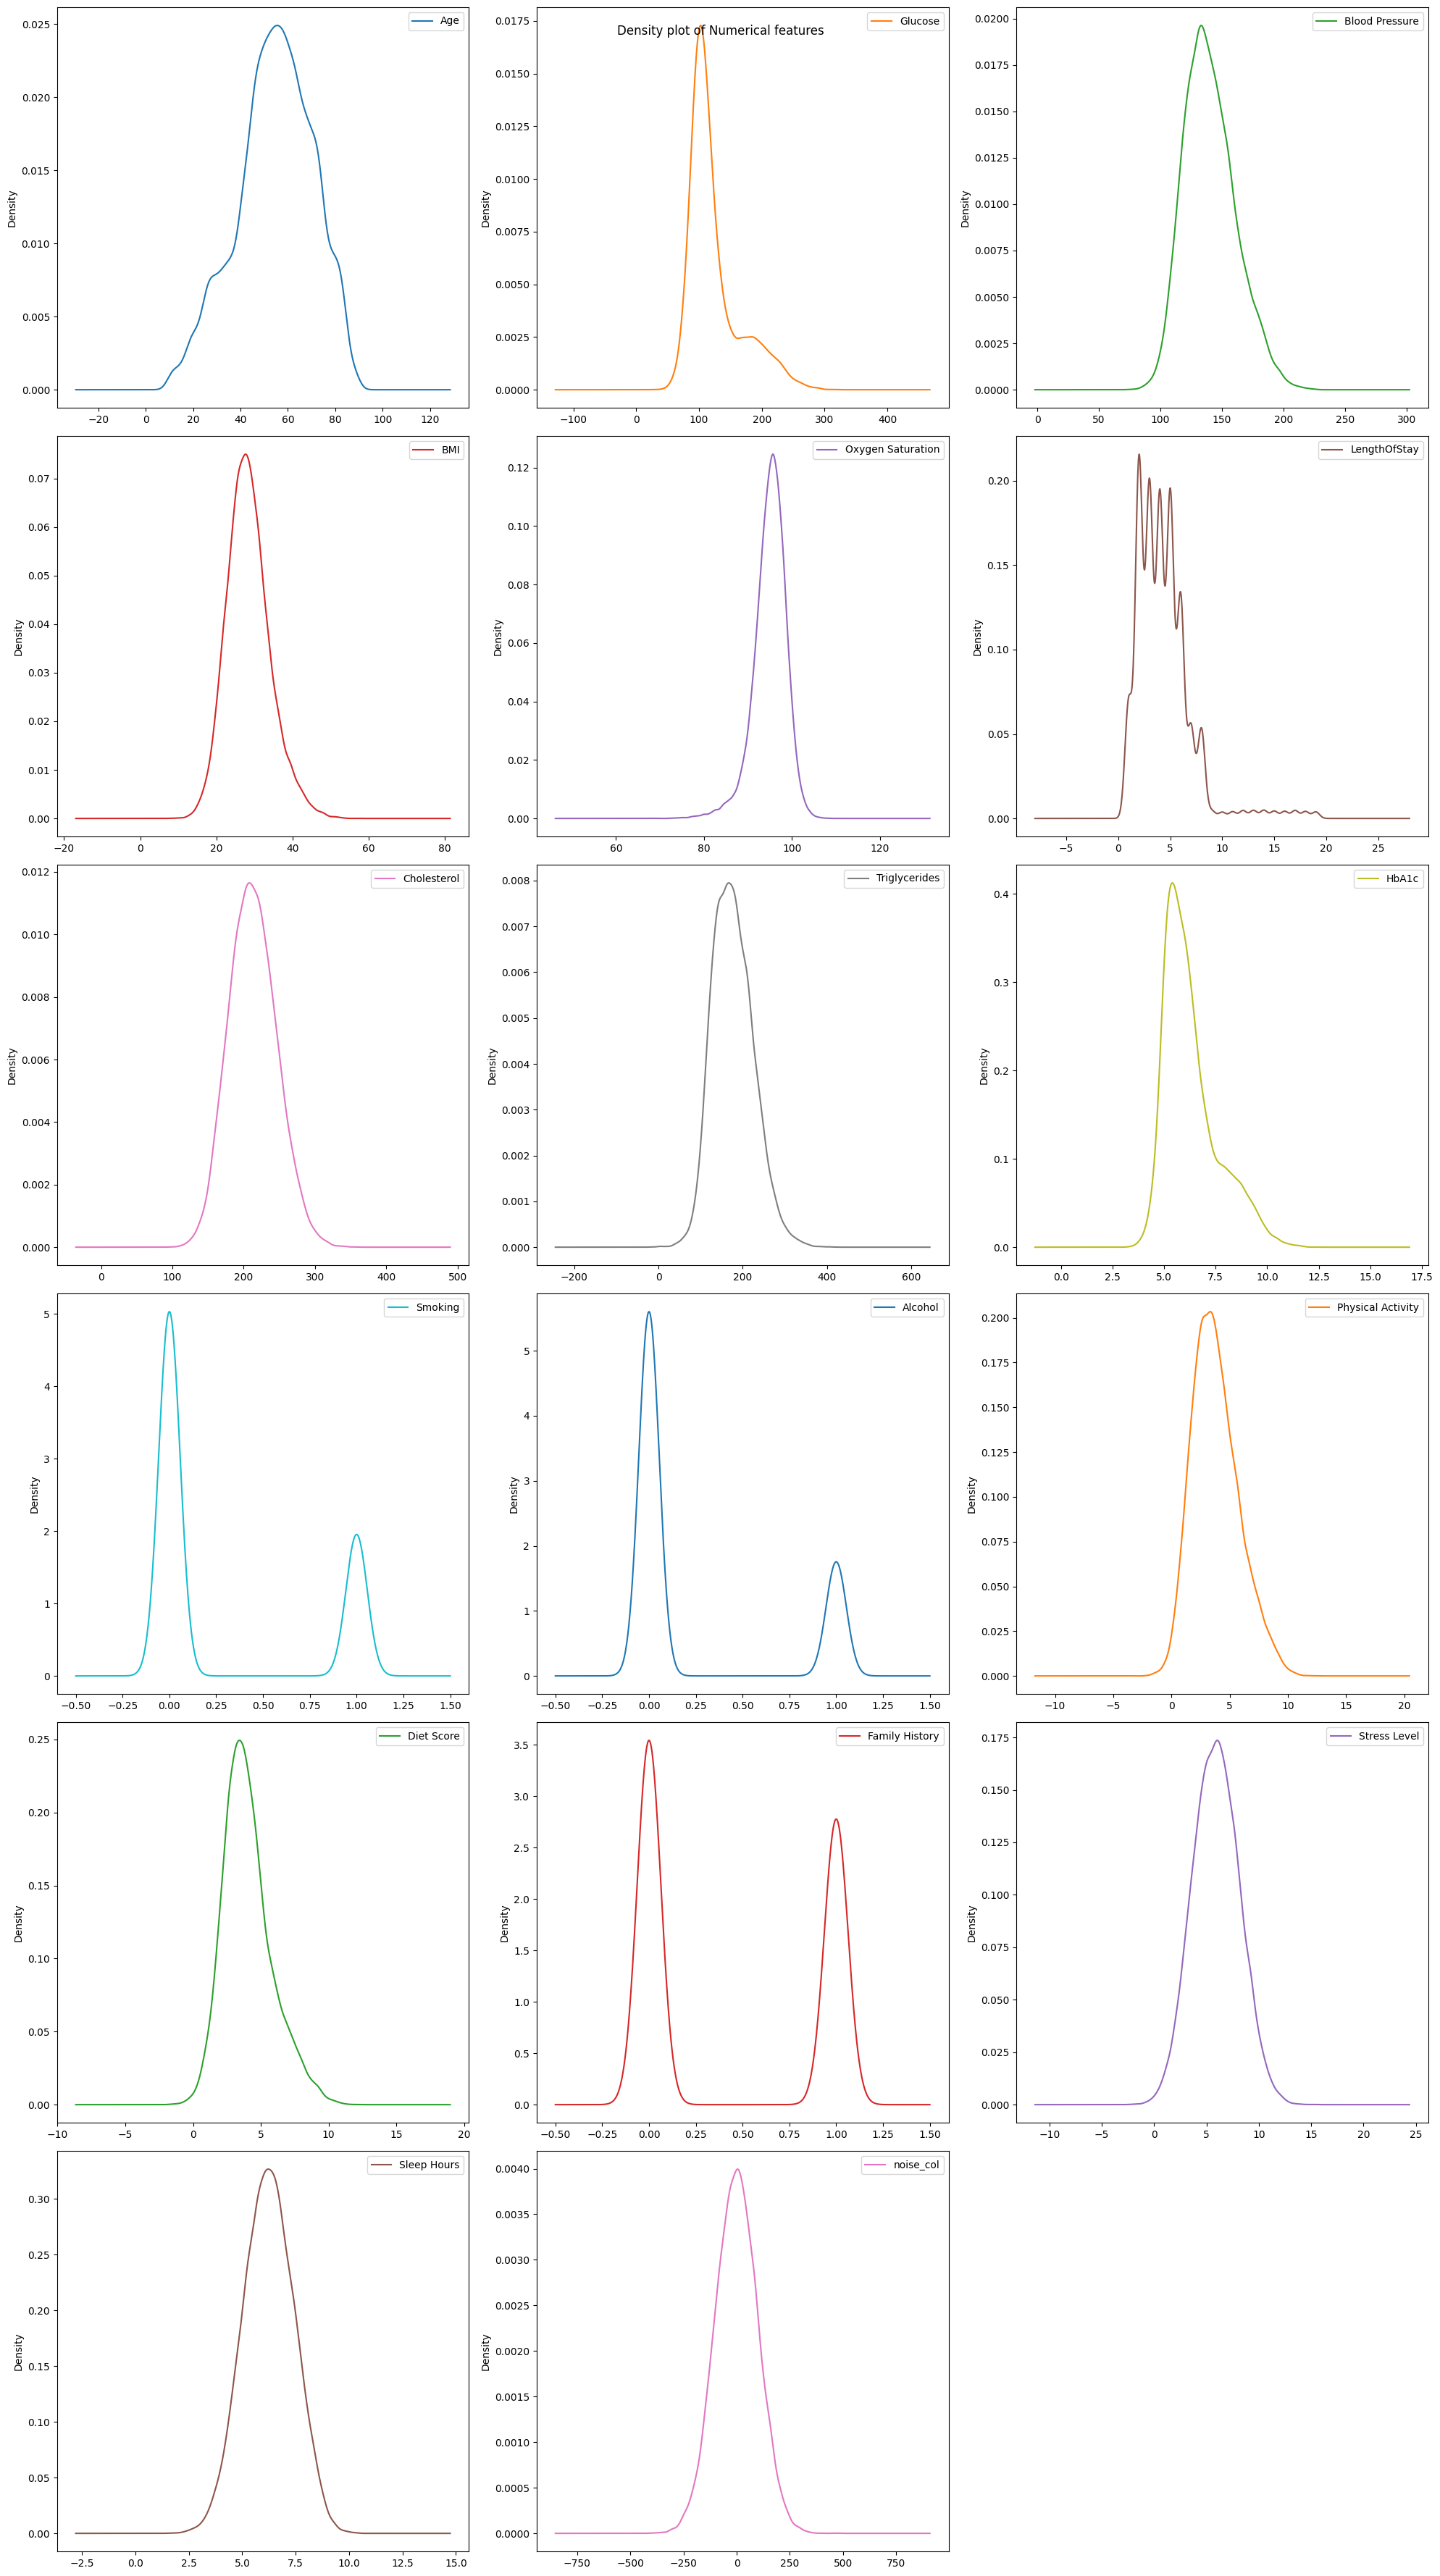

In [ ]:
distribution_analyzer.plot_numerical_density()

#### Nhận xét:
1. Phân phối Gần Chuẩn (Near-Normal Distribution)
Các cột này có hình chuông, tương đối đối xứng, gợi ý phân phối gần chuẩn hoặc đã được chuẩn hóa.
    - BMI
    - Oxygen Saturation
    - Cholesterol
    - Triglycerides: Hơi lệch phải nhẹ.
    - Sleep Hours
    - Stress level
    - Noise col: đối xứng, có thể là dữ liệu giả lập gây nhiễu.

2. Phân phối Lệch (Skewed Distribution)
Các cột này có độ lệch đáng kể, thường là lệch phải (tail kéo dài về bên phải).
    - Glucose: Lệch phải mạnh, cho thấy hầu hết bệnh nhân có mức đường huyết thấp, nhưng có một số lượng đáng kể có mức đường huyết rất cao (có thể là bệnh nhân tiểu đường).
    - Blood Pressure: Lệch phải nhẹ, tập trung ở mức huyết áp bình thường.
    - LengthOfStay: Lệch phải mạnh, không có hình chuông, cho thấy hầu hết thời gian nằm viện ngắn, nhưng có một số ít trường hợp nằm viện rất dài.
    - HbA1c: Lệch phải, tập trung ở mức thấp/trung bình.
    - Physical Activity: Khá đối xứng, nhưng có độ lệch nhẹ.
    - Diet Score: Phân phối tập trung quanh giá trị trung bình, hơi lệch phải nhẹ.
    - Age: Phân phối lệch trái nhẹ (left-skewed)

3. Phân phối Lưỡng cực (Bimodal Distribution)
Các cột này cho thấy hai hoặc nhiều đỉnh, thường là dấu hiệu của các biến phân loại được mã hóa bằng số hoặc sự tồn tại của hai nhóm người rõ rệt trong dữ liệu.
    - Smoking: Lưỡng cực với hai đỉnh rõ ràng.
    - Alcohol: Lưỡng cực tương tự như Smoking.
    - Family History: Lưỡng cực, cũng thể hiện biến nhị phân.


--- Boxplot ---


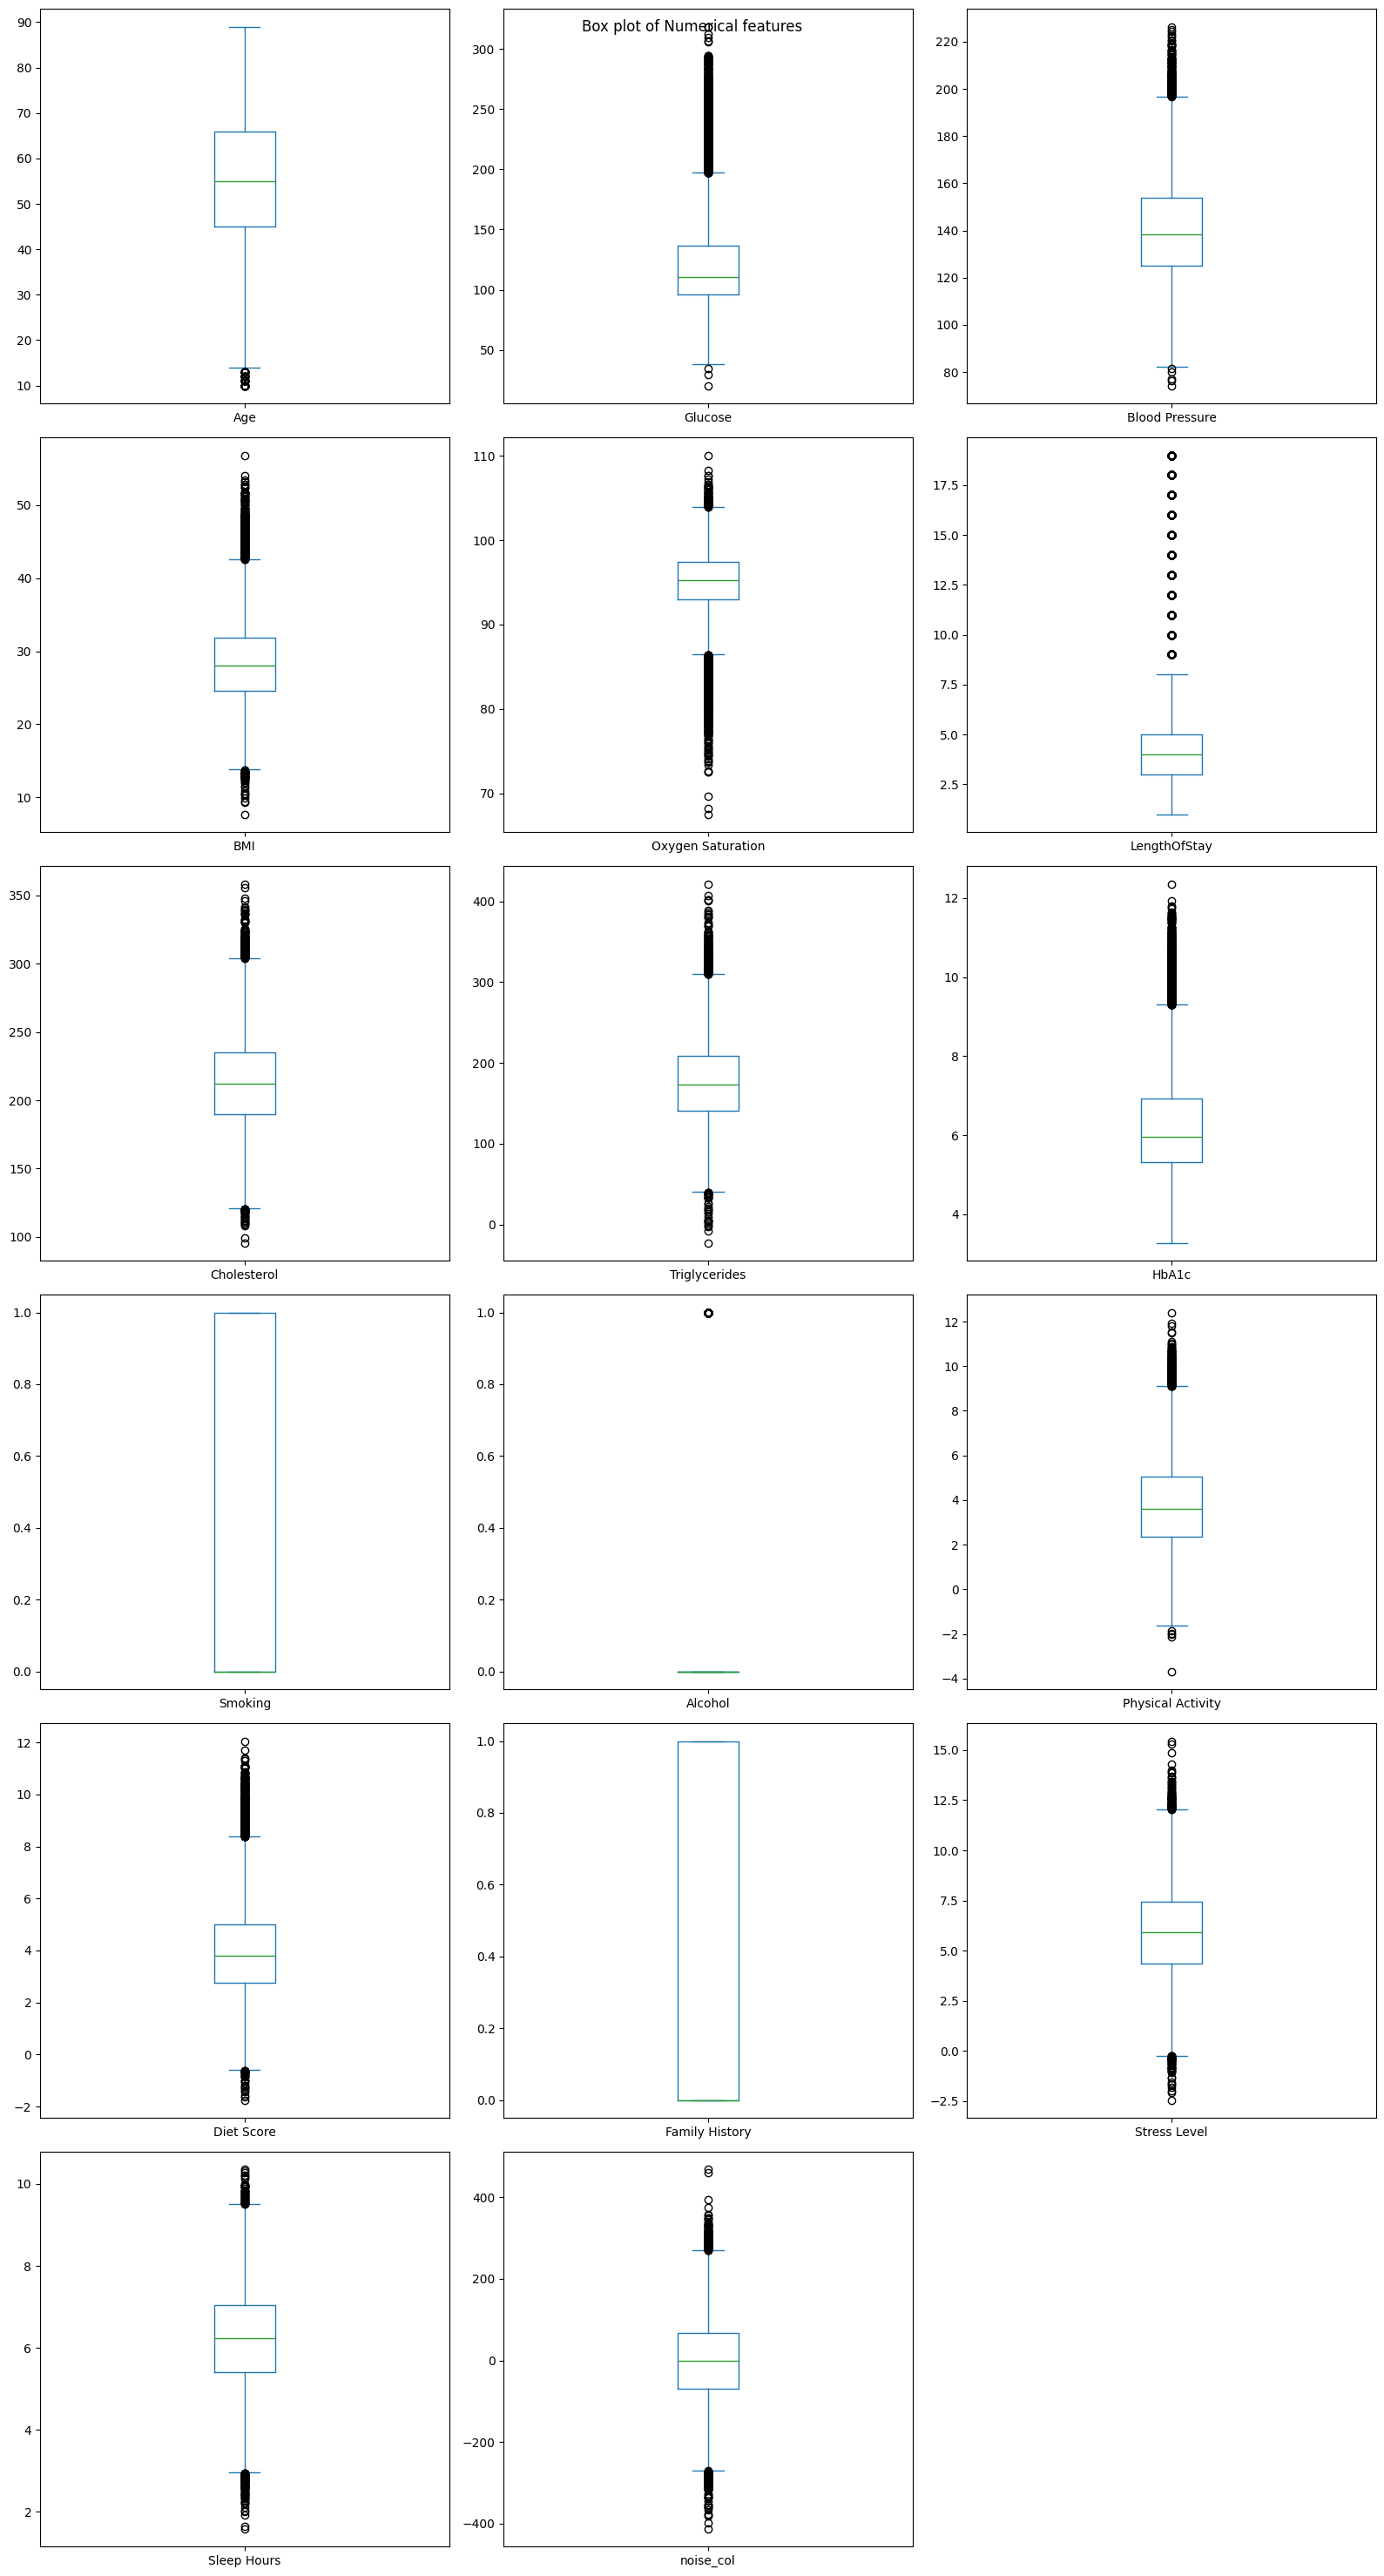

In [ ]:
# Vẽ boxplot
distribution_analyzer.plot_numerical_boxplot()

#### Nhận xét:
1. Các cột không cần kiểm tra thêm
    - Age: phân bố hợp lý (20–80), có một vài outliers thấp nhưng không quá cực đoan → giữ lại.
    - BMI: phân bố hợp lý, outliers nhẹ
    - LengthOfStay: một số outliers cao (~15 ngày) nhưng hợp lý trong y tế → giữ.
    - Smoking, Family History: dạng nhị phân, không có outlier.
    - noise_col: giá trị âm và cực lớn, rõ ràng là nhiễu → cần loại bỏ hoàn toàn.

2. Các cột cần kiểm tra thêm
    - Glucose: nhiều outliers cao (≥250) nhưng hợp lý với bệnh nhân tiểu đường → giữ lại, chưa cần loại bỏ nhưng cần phải kiểm tra.
    - Blood Pressure: nhiều giá trị cực đoan cả thấp lẫn cao (>200) -> cần phải kiểm tra thêm.
    - Oxygen Saturation: hầu hết trong khoảng 90–100, vài outliers thấp (~70) phù hợp tình trạng bệnh ví dụ như hen suyễn → cần kiểm tra thêm.
    - Cholesterol: xuất hiện giá trị thấp bất thường (<100) và nhiều outliers → có thể là lỗi nhập liệu, cần kiểm tra thêm.
    - Triglycerides: rất nhiều outliers cao (>300) và thấp bất thường (~0–50) → cột bị nhiễu mạnh, cần kiểm tra thêm.
    - HbA1c: phân bố hợp lý (5–7), outliers cao phản ánh bệnh tiểu đường → cần kiểm tra thêm.
    - Alcohol: gần như toàn 0 -> kiểm tra thêm theo kiểu nhị phân.
    - Physical Activity, Diet Score, Stress Level, Sleep Hours: phân bố tự nhiên, outliers nhẹ nhưng cần kiểm tra khi đối chiếu với mô tả.


## Dữ liệu phân loại


--- Thống kê biến phân loại ---

Phân phối của Gender:
Gender
Female    0.428833
Male      0.421167
NaN       0.150000
Name: proportion, dtype: float64

Phân phối của Medical Condition:
Medical Condition
Hypertension    0.237333
Diabetes        0.213900
NaN             0.150000
Obesity         0.128567
Healthy         0.101300
Asthma          0.067900
Arthritis       0.059867
Cancer          0.041133
Name: proportion, dtype: float64

Phân phối của random_notes:
random_notes
###      0.252500
??       0.251567
ipsum    0.249200
lorem    0.246733
Name: proportion, dtype: float64

--- Phân phối cho biến phân loại ---


/tmp/ipython-input-1796550932.py:116: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=self.df, palette='viridis')
/tmp/ipython-input-1796550932.py:116: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=self.df, palette='viridis')
/tmp/ipython-input-1796550932.py:116: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=self.df, palette='viridis')


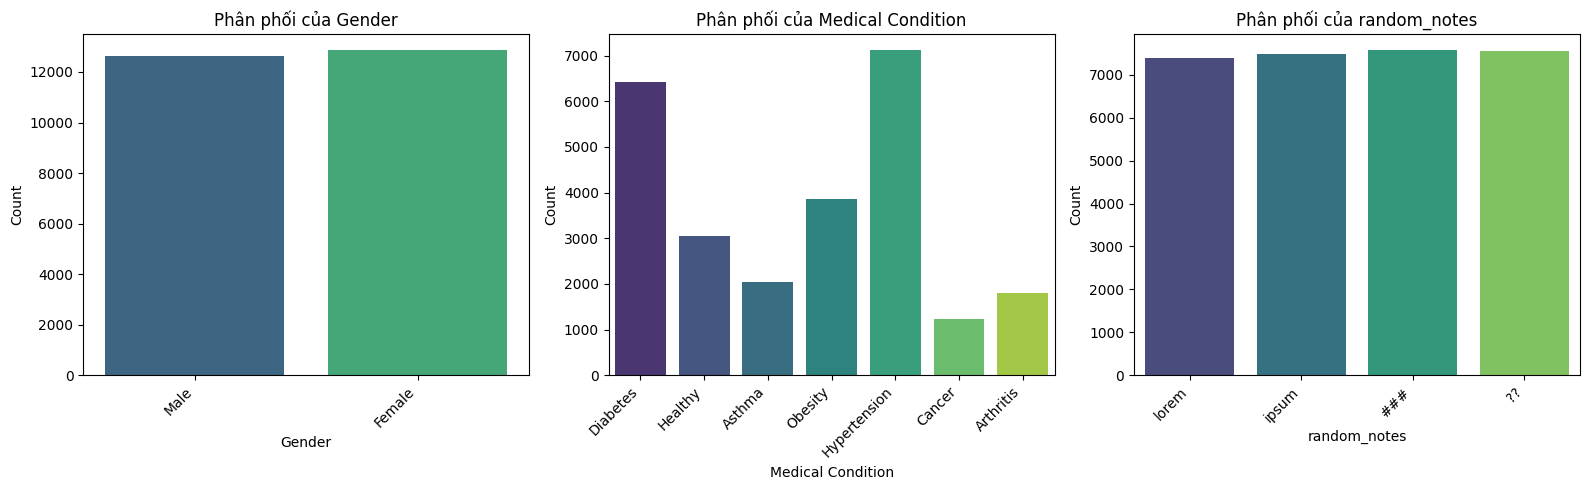

In [ ]:
distribution_analyzer.describe_categorical_data()
distribution_analyzer.plot_categorical_distribution()


**Nhận xét:**
- Phân bố về tỷ lệ giới tính không có gì bất thường
- random_notes không có ý nghĩa nhiều về mặt thống kê và mô hình, là ghi chú mang tính ngẫu nhiên hoặc phải đặt trong ngữ cảnh y khoa cụ thể, nên có thể loại bỏ (sau khi kiểm tra tương quan với các biến khác)

## Dữ liệu nhị phân


--- Phân phối cho biến nhị phân ---


/tmp/ipython-input-1796550932.py:146: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=self.df, palette='viridis')
/tmp/ipython-input-1796550932.py:146: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=self.df, palette='viridis')
/tmp/ipython-input-1796550932.py:146: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=self.df, palette='viridis')


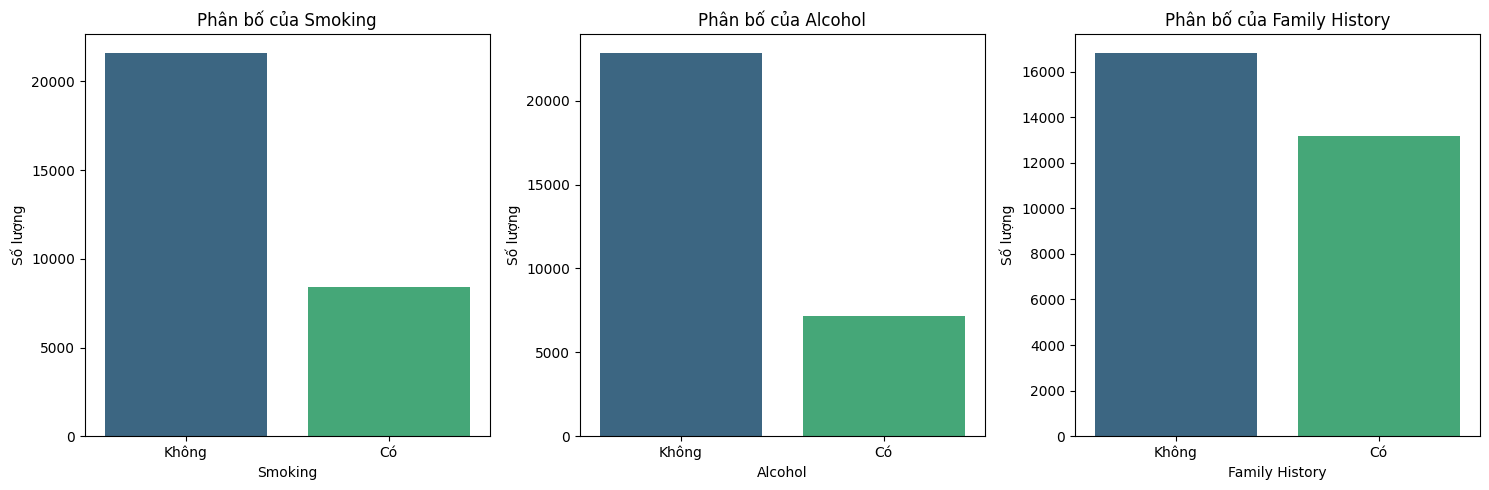

In [ ]:
binary_cols = ['Smoking', 'Alcohol', 'Family History']
distribution_analyzer.plot_binary_distribution(binary_cols)

### Nhận xét:

- **Smoking**: Có sự mất cân bằng rõ rệt, số lượng người không hút thuốc (0) áp đảo so với người hút thuốc (1).
- **Alcohol**: Tương tự như Smoking, số lượng người không sử dụng rượu (0) chiếm đa số so với người có sử dụng (1).
- **Family History**: Phân bố tương đối cân bằng hơn so với hai cột trên, tuy nhiên số lượng người không có tiền sử bệnh lý gia đình (0) vẫn cao hơn một chút so với người có tiền sử (1).

Tuy có sự mất cân bằng dữ liệu nhưng xét trên ngữ cảnh y tế, những sự mất cân bằng này có vẻ bình thường

## Kiểm tra tính hợp lý của các outliers và dữ liệu âm

Một giá trị ngoại lai sẽ hợp lý nếu đặt trong bối cảnh phù hợp. Ví dụ, người có Glucose cao bất thường có thể do bệnh tiểu đường. Ta sẽ tiến hành kiểm tra tất cả các outlier ở các cột như vậy

### Glucose

Glucose cao bất thường -> Nghi ngờ bệnh nhân tiểu đường

In [ ]:
# Đánh giá tác động của dữ liệu ngoại lai
distribution_analyzer.analyze_outlier_impact('Glucose')
distribution_analyzer.min_max_values('Glucose')



--- Phân tích giá trị ngoại lai cho Glucose và quan hệ với Medical Condition ---
Số giá trị 'Medical Condition' trong nhóm ngoại lai:
Medical Condition
Diabetes        1853
NaN              322
Cancer             1
Hypertension       1
Name: count, dtype: int64

Min ngoại lai của Glucose: 20.32
Max ngoại lai của Glucose: 318.51

In top giá trị thấp và cao nhất:
[20.32 29.5  34.35 38.06 41.06 43.44 43.45 44.35 44.56 44.7  46.19 46.34
 46.67 48.62 49.19 50.29 50.8  50.86 51.12 51.14 51.38 51.47 51.57 51.75
 52.12 52.13 52.29 52.32 52.33 52.61 52.67 52.77 53.24 53.31 53.53 53.7
 53.8  54.25 54.71 54.73 54.93 55.01 55.15 55.22 55.23 55.34 55.39 55.46
 55.54 55.71]
[278.35 278.41 278.73 279.19 279.22 279.61 279.7  279.9  280.98 281.35
 282.13 282.48 282.81 282.99 283.26 283.86 284.05 284.49 284.69 284.9
 285.28 286.65 287.05 287.08 287.12 288.12 288.16 288.25 288.88 289.
 289.17 290.2  290.26 290.84 291.44 291.51 291.9  292.06 292.81 293.35
 293.6  294.07 294.37 294.42 306.19 306.52 309.59

Như vậy, quả thực phần lớn các trường hợp cho bất thường trong Glucose đều do tiểu đường gây ra, và giá trị ngoại lai không đột ngột xuất hiện mà xuất hiện với nhiều giá trị lân cận -> Dữ liệu không bất thường

### Blood Pressure

Blood Pressure cao bất thường -> Nghi ngờ bệnh nhân cao huyết áp

In [ ]:
distribution_analyzer.analyze_outlier_impact('Blood Pressure')
distribution_analyzer.min_max_values('Blood Pressure')


--- Phân tích giá trị ngoại lai cho Blood Pressure và quan hệ với Medical Condition ---
Số giá trị 'Medical Condition' trong nhóm ngoại lai:
Medical Condition
Hypertension    181
NaN              30
Asthma            4
Cancer            1
Name: count, dtype: int64

Min ngoại lai của Blood Pressure: 74.24
Max ngoại lai của Blood Pressure: 226.38

In top giá trị thấp và cao nhất:
[74.24 76.34 76.98 79.92 81.32 82.3  82.98 83.42 83.57 83.9  84.56 84.56
 84.99 85.5  85.79 85.91 86.27 86.5  86.7  86.88 87.16 87.19 87.49 87.65
 87.8  87.81 88.03 88.13 88.15 88.18 88.21 88.34 88.51 88.62 88.64 88.67
 89.05 89.34 89.43 89.65 89.66 89.71 89.78 89.97 90.19 90.22 90.71 90.77
 90.78 90.83]
[209.2  209.33 209.37 209.51 209.52 209.71 210.11 210.63 210.72 210.73
 210.87 210.95 211.15 211.41 211.42 211.54 211.66 212.23 212.33 212.44
 212.47 212.59 212.65 213.12 213.39 213.44 214.24 214.52 214.75 214.87
 215.37 215.37 215.82 216.13 216.6  216.69 217.96 218.28 218.86 219.
 219.01 219.3  220.16 220.69 2

Như vậy quả thật đa phần các bệnh nhân có Blood Pressure bất thường đều rơi vào tình trạng cao huyết áp

Bộ dữ liệu gốc cũng cho thấy giá trị ngoại lai không phải "bất thường" đột ngột xuất hiện mà có các giá trị lân cận

### Oxygen Saturation

In [ ]:
distribution_analyzer.analyze_outlier_impact('Oxygen Saturation')
distribution_analyzer.min_max_values('Oxygen Saturation')


--- Phân tích giá trị ngoại lai cho Oxygen Saturation và quan hệ với Medical Condition ---
Số giá trị 'Medical Condition' trong nhóm ngoại lai:
Medical Condition
Asthma          584
Cancer          125
NaN             123
Hypertension     20
Diabetes         17
Arthritis        16
Obesity          13
Name: count, dtype: int64

Min ngoại lai của Oxygen Saturation: 67.51
Max ngoại lai của Oxygen Saturation: 110.07

In top giá trị thấp và cao nhất:
[67.51 68.19 69.65 72.49 72.56 72.65 73.36 73.65 73.82 73.85 74.04 74.43
 74.47 74.48 74.74 74.74 74.8  74.93 75.09 75.13 75.28 75.45 75.51 75.67
 75.9  75.93 76.09 76.22 76.3  76.31 76.46 76.79 76.8  76.92 76.93 77.05
 77.08 77.08 77.14 77.18 77.23 77.25 77.3  77.31 77.4  77.42 77.43 77.45
 77.46 77.6 ]
[104.52 104.54 104.59 104.59 104.62 104.63 104.67 104.7  104.71 104.8
 104.82 104.84 104.84 104.86 104.86 104.88 105.06 105.06 105.09 105.12
 105.17 105.18 105.21 105.21 105.24 105.25 105.34 105.48 105.57 105.59
 105.68 105.7  105.7  105.96 10

Bộ dữ liệu gốc cũng cho thấy giá trị ngoại lai không phải "bất thường" đột ngột xuất hiện mà có các giá trị lân cận

### Cholesterol


In [ ]:
outliers_df = distribution_analyzer.analyze_outlier_impact('Cholesterol', return_outliers = True)


--- Phân tích giá trị ngoại lai cho Cholesterol và quan hệ với Medical Condition ---
Số giá trị 'Medical Condition' trong nhóm ngoại lai:
Medical Condition
Hypertension    119
NaN              24
Obesity          21
Diabetes         12
Healthy           8
Asthma            1
Arthritis         1
Name: count, dtype: int64

Min ngoại lai của Cholesterol: 95.73
Max ngoại lai của Cholesterol: 358.37


Có thể cần phải kiểm tra các trường hợp sức khỏe bình thường lại có mức cholesterol bất thường

In [ ]:
outliers_df[outliers_df['Medical Condition'] == 'Healthy']

,Age,Gender,Medical Condition,Glucose,Blood Pressure,BMI,Oxygen Saturation,LengthOfStay,Cholesterol,Triglycerides,HbA1c,Smoking,Alcohol,Physical Activity,Diet Score,Family History,Stress Level,Sleep Hours,random_notes,noise_col
7976,60.0,Male,Healthy,103.16,126.04,21.93,97.79,1,120.05,128.71,5.37,1,0,6.87,5.30,1,4.49,6.96,###,125.726831
10274,45.0,Male,Healthy,113.99,NaN,25.55,98.08,2,113.93,134.77,5.03,0,1,7.35,6.78,0,2.07,7.35,??,128.722060
10681,24.0,Male,Healthy,NaN,134.17,9.88,95.30,2,117.16,125.68,5.34,0,0,8.47,10.81,0,-0.45,8.46,??,31.363521
12511,61.0,Male,Healthy,88.63,111.86,25.96,97.73,2,120.09,133.61,4.54,0,0,7.48,3.87,0,6.01,8.29,lorem,223.636535
19308,62.0,Male,Healthy,103.10,NaN,23.70,94.80,2,117.61,148.53,5.12,0,1,7.49,8.43,0,1.08,8.21,###,-57.422402
19507,23.0,NaN,Healthy,81.44,101.15,27.13,97.34,1,112.30,119.33,5.25,0,0,6.99,7.18,1,3.20,8.61,??,-121.285270
21043,25.0,Male,Healthy,135.67,118.86,28.57,95.75,2,112.07,145.41,5.18,1,0,7.02,5.31,0,4.16,8.45,###,-121.906772
24042,29.0,Male,Healthy,99.91,122.37,25.26,100.37,1,119.26,117.52,5.89,0,1,5.54,6.25,1,2.91,5.03,lorem,17.905259


Mức cholesterol 110-120 mg/dL được xem như bình thường đối với người trưởng thành

In [ ]:
distribution_analyzer.min_max_values('Cholesterol')


In top giá trị thấp và cao nhất:
[ 95.73  99.59 108.27 109.03 109.9  109.96 110.05 111.56 112.07 112.3
 113.3  113.93 114.88 115.32 115.43 116.26 117.16 117.61 117.9  118.25
 119.12 119.2  119.26 119.46 119.68 119.76 120.05 120.09 120.1  120.26
 120.5  120.58 120.91 121.5  121.77 121.86 122.24 122.28 122.42 122.46
 123.22 123.27 123.67 123.67 123.81 123.85 123.86 123.89 124.1  124.15]
[317.74 318.19 318.22 318.32 318.35 318.51 318.67 318.82 318.86 319.22
 319.41 319.71 319.81 319.91 320.35 321.06 321.09 321.61 321.67 322.99
 323.1  323.18 323.35 323.39 323.96 324.29 324.94 325.24 325.62 329.89
 330.31 330.53 330.79 331.33 331.93 332.18 332.73 335.36 336.2  336.73
 336.95 338.07 339.22 339.87 340.68 341.38 346.2  348.14 355.27 358.37]


Như vậy, bộ dữ liệu gốc cũng cho thấy giá trị ngoại lai không phải "bất thường" đột ngột xuất hiện mà có các giá trị lân cận, đồng thời, các ghi nhận Cholesterol bất thường hầu hết đều do bệnh lý.

### Triglycerides

In [ ]:
distribution_analyzer.analyze_outlier_impact('Triglycerides')


--- Phân tích giá trị ngoại lai cho Triglycerides và quan hệ với Medical Condition ---
Số giá trị 'Medical Condition' trong nhóm ngoại lai:
Medical Condition
Obesity         174
Hypertension     62
NaN              44
Diabetes          4
Cancer            2
Name: count, dtype: int64

Min ngoại lai của Triglycerides: -22.48
Max ngoại lai của Triglycerides: 421.51


Có thể xác nhận lượng tryglicerides bất thường đều do nguyên nhân bệnh lý

In [ ]:
distribution_analyzer.min_max_values('Triglycerides')


In top giá trị thấp và cao nhất:
[-22.48  -8.14  -2.92  -1.58   1.14   3.43   4.     4.6    4.82   5.51
   9.71  14.2   15.67  18.    19.36  20.32  22.54  25.67  26.15  33.01
  33.18  33.2   33.37  34.87  35.8   37.6   37.68  37.74  37.9   38.8
  38.8   39.08  39.39  39.65  40.01  40.78  40.87  41.36  41.5   42.55
  42.69  42.74  42.95  43.84  44.38  45.25  45.41  45.75  46.11  46.34]
[346.85 347.03 347.38 347.79 347.92 348.36 348.42 348.48 348.72 349.09
 349.35 350.08 351.22 351.46 352.83 353.   353.29 353.33 354.64 355.94
 356.32 356.35 357.15 357.61 357.65 357.94 358.12 358.7  360.2  360.35
 361.78 361.99 362.59 369.02 369.39 370.49 372.29 373.27 379.78 380.43
 380.96 383.69 384.5  386.66 388.99 400.58 401.62 401.97 406.64 421.51]


Chỉ số mỡ máu âm là không hợp lý, nên có thể chắc chắn các giá trị này là do lỗi nhập liệu, rất có thể do lỗi nhập số âm/dương -> Xử lý bằng cách lấy giá trị tuyệt đối

### HbA1c

In [ ]:
distribution_analyzer.analyze_outlier_impact('HbA1c')



--- Phân tích giá trị ngoại lai cho HbA1c và quan hệ với Medical Condition ---
Số giá trị 'Medical Condition' trong nhóm ngoại lai:
Medical Condition
Diabetes    881
NaN         170
Name: count, dtype: int64

Min ngoại lai của HbA1c: 9.31
Max ngoại lai của HbA1c: 12.36


Hầu hết các trường hợp có chỉ số HbA1c bất thường đều do tiểu đường

In [ ]:
distribution_analyzer.min_max_values('HbA1c')


In top giá trị thấp và cao nhất:
[3.28 3.33 3.37 3.45 3.46 3.46 3.46 3.54 3.56 3.56 3.61 3.66 3.66 3.67
 3.68 3.69 3.69 3.7  3.7  3.71 3.72 3.73 3.74 3.74 3.75 3.75 3.76 3.77
 3.77 3.77 3.78 3.78 3.8  3.8  3.81 3.81 3.82 3.82 3.83 3.83 3.84 3.85
 3.85 3.85 3.85 3.86 3.86 3.87 3.87 3.87]
[11.04 11.04 11.07 11.07 11.08 11.1  11.11 11.11 11.12 11.12 11.14 11.14
 11.15 11.17 11.18 11.21 11.21 11.23 11.25 11.25 11.26 11.27 11.28 11.35
 11.37 11.38 11.39 11.43 11.44 11.44 11.44 11.46 11.47 11.48 11.49 11.5
 11.51 11.53 11.54 11.54 11.56 11.58 11.6  11.62 11.65 11.73 11.77 11.8
 11.94 12.36]


Như vậy, bộ dữ liệu gốc cũng cho thấy giá trị ngoại lai không phải "bất thường" đột ngột xuất hiện mà có các giá trị lân cận.

### Physical Activity, Diet Score, Stress Level

Diet Score và Stress Level đều là các thang đo, và không rõ giới hạn thang đo như thế nào. Một số giá trị âm ở hai thuộc tính này đã được phát hiện trước đó, cần tiến hành kiểm tra các giá trị âm này là lỗi ngẫu nhiên hay thực sự có ý nghĩa

In [ ]:
print('\n--- Kiểm tra giá trị âm trong một số cột ---')
distribution_analyzer.check_negative_values(['Physical Activity', 'Diet Score', 'Stress Level'])


--- Kiểm tra giá trị âm trong một số cột ---

--- Kiểm tra giá trị âm ---
Giá trị âm trong 'Physical Activity': [-0.2  -0.8  -0.1  -0.89 -0.67 -0.65 -0.39 -0.66 -0.86 -0.16 -0.33 -1.1
 -0.04 -0.38 -0.15 -0.68 -0.07 -0.02 -0.42 -0.21 -0.52 -0.22 -1.46 -0.23
 -0.3  -1.26 -0.31 -0.27 -1.14 -0.09 -1.25 -0.06 -0.81 -0.24 -1.13 -0.44
 -0.51 -0.34 -0.46 -0.54 -0.19 -0.55 -0.97 -0.84 -0.59 -0.05 -1.64 -1.29
 -0.93 -1.27 -0.29 -1.55 -0.01 -0.18 -1.16 -0.77 -1.52 -0.71 -1.51 -3.68
 -0.53 -1.33 -1.02 -1.04 -1.44 -0.76 -0.57 -0.26 -1.6  -0.14 -0.11 -0.28
 -1.15 -1.03 -0.41 -1.42 -0.64 -0.43 -1.22 -0.82 -0.63 -0.75 -1.43 -1.
 -0.79 -0.13 -0.74 -0.61 -0.36 -0.69 -0.58 -0.88 -0.49 -0.5  -0.45 -1.48
 -0.08 -1.86 -0.35 -0.73 -0.72 -1.57 -1.54 -0.25 -0.32 -0.6  -0.99 -2.15
 -0.85 -2.   -1.39 -0.12 -1.09 -1.07 -1.11 -1.96]
Số lượng: 302
Giá trị âm trong 'Diet Score': [-0.25 -0.22 -0.01 -1.09 -0.67 -0.02 -0.11 -0.61 -0.03 -0.09 -0.06 -1.55
 -0.84 -0.07 -1.75 -0.26 -0.23 -0.15 -0.34 -1.28 -0.33 -0.4  -0.6

**Nhận xét:**
- Ở đây không cần quan tâm đến giá trị cao bất thường của Physical Activity, do nó vẫn hợp lý, nhưng nếu đơn vị là hours/week thì giá trị âm chắc chắn sẽ là lỗi nhập liệu -> Xử lý bằng cách lấy giá trị tuyệt đối
- Giá trị âm trong Diet Score và Stress Level xuất hiện tương đối đồng đều, và có nhiều giá trị âm, nên khó có thể kết luận rằng dữ liệu này là lỗi. Tuy nhiên, để thang đo đồng bộ các giá trị dương và tránh các giá trị ngoại lai (do giá trị âm cũng đồng thời là giá trị ngoại lai dựa vào boxplot), nên sẽ lấy giá trị tuyệt đối thay thế

### Kết luận
Trải qua các bước kiểm tra phân phối của dữ liệu, mặc dù nhận thấy có nhiều bất thường, nhưng chưa thể kết luận các bất thường này là lỗi và nhất định phải chỉnh sửa, ngoại trừ dữ liệu âm trong Triglycerides và Physical Activity cần phải được điều chỉnh.

# Tương quan giữa dữ liệu số


--- Ma trận tương quan và heatmap ---


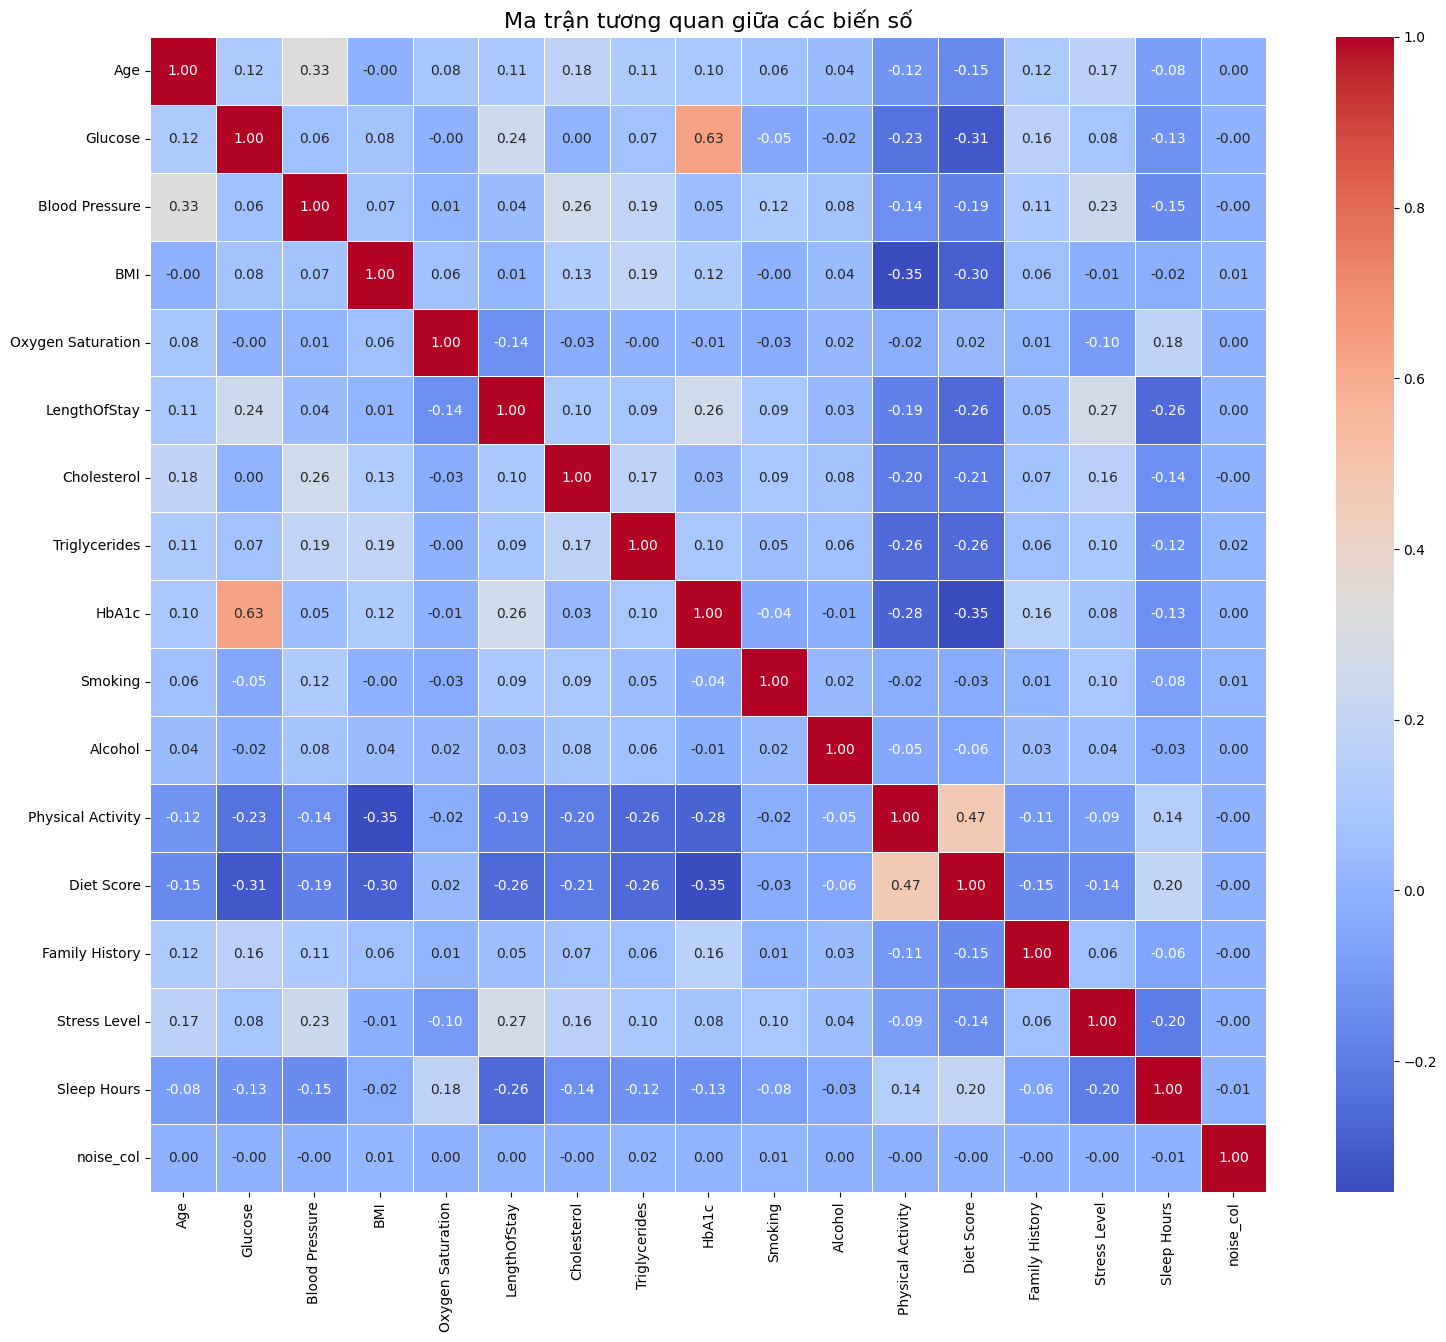

In [ ]:
correlation_analyzer.plot_correlation_matrix()


## Nhận xét về Heatmap:
1. Hầu hết các đặc trưng đều chỉ có mối tương quan yếu với nhau
2. Giữa Glucose và HbA1c có mối tương quan mạnh hơn, điều này là hợp lý do HbA1c là chỉ số phản ánh mức Glucose trung bình trong 2-3 tháng, nên việc chúng tương quan mạnh là điều hoàn toàn mong đợi.
3. Giữa Diet Score và Physical Activity có mối tương quan dương cao thứ hai (0.47), có thể phản ánh rằng sự tập trung thói quen lành mạnh.

## Tương quan với Medical Condition

Do sử dụng Medical Condition làm biến mục tiêu, ta cần kiểm tra xem liệu các đặc trưng khác có tương quan tuyến tính với biến mục tiêu hay không. Tuy nhiên, do Medical Condition là biến phân loại, nên để kiểm tra, cần chuyển thành dữ liệu số bằng cách Label Encoding.


--- Phân tích tương quan với biến mục tiêu: 'Medical Condition' ---

--- Heatmap Tương quan với 'Medical Condition Encoded' đã mã hóa ---


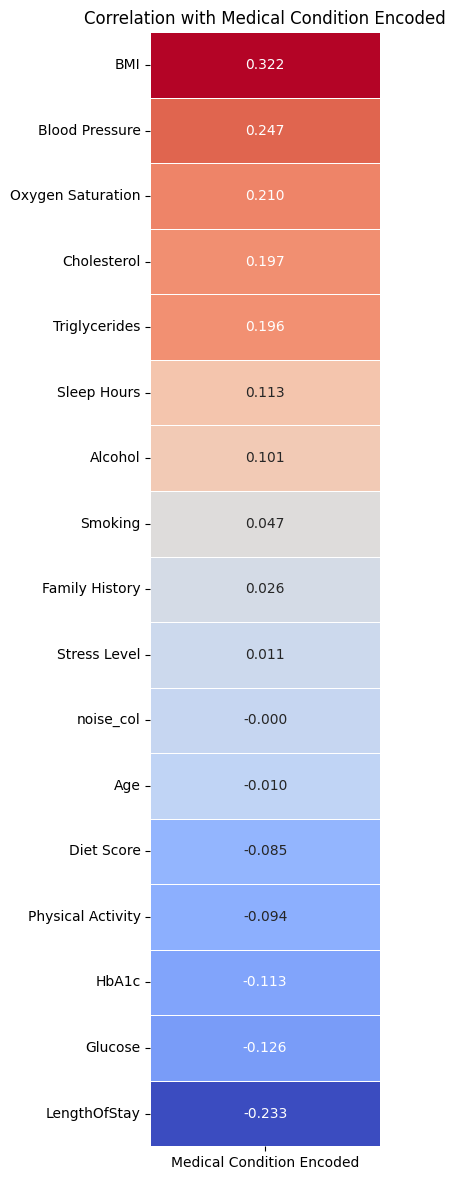

In [ ]:
correlation_analyzer.analyze_target_correlation(target_col='Medical Condition')

**Nhận xét:**

1. BMI, Blood Pressure, Oxygen Saturation, Cholesterol và Triglycerides có tương quan dương cao nhất, cho thấy liên hệ tương đối rõ rệt hơn với tình trạng bệnh.

2. Sleep Hours, Alcohol và Smoking có tương quan dương nhưng yếu, gợi ý ảnh hưởng nhỏ hoặc gián tiếp.

3. Age, Family History và Stress Level gần như không có tương quan đáng kể.

4. Diet Score, Physical Activity, HbA1c và Glucose có tương quan âm nhẹ, có thể do mối quan hệ không tuyến tính hoặc đặc điểm mã hóa biến.

5. LengthOfStay có tương quan âm tương đối mạnh nhất trong nhóm âm, cho thấy thời gian nằm viện có thể liên quan tới cách phân loại Medical Condition.

6. Không có hệ số tương quan nào thật sự mạnh, hàm ý tình trạng bệnh chịu ảnh hưởng đa yếu tố và không đơn thuần tuyến tính.

# Tổng hợp các vấn đề cần xử lý khi thực hiện tiền xử lý dữ liệu

1. Dữ liệu âm trong Triglycerides và Physical Activity chắc chắn là lỗi, cần phải thay thế bằng giá trị tuyệt đối. Dữ liệu âm trong Diet Score, Stress Level cũng lấy giá trị tuyệt đối.
2. Dữ liệu trống
    - Trong Age, Glucose, Blood Pressure: điền dữ liệu trống bằng trung vị
    - Trong Gender: điền ngẫu nhiên giới tính (Male/Female).
    - Trong Medical Condition: tách thành tập kiểm tra không nhãn (với Medical Condition là target).
3. Loại bỏ các cột gây nhiễu (random_notes, noise_col)
4. Chuẩn hóa (Standard/Min-Max Scaling): đối với các đặc trưng dữ liệu số có phân phối xấp xỉ phân phối chuẩn sẽ thực hiện Standard Scaling, còn các đặc trưng dữ liệu số không xấp xỉ phân phối chuẩn sẽ sử dụng Min-Max Scaling. Quá trình này sẽ được thực hiện sau khi đã điền các giá trị trống thông qua lớp PreProcessor.
5. Mã hóa đặc trưng phân loại (One-hot Encoding/Label Encoding): cần phải Label Encoding với Medical Condition do chọn làm biến mục tiêu. Gender có thể được mã hóa bằng giá trị nhị phân 0/1



# Kiểm tra phân phối giữa hai nhóm

Ý tưởng được đặt ra là, để xử lý các mẫu có Medical Condition là dữ liệu trống, có thể tách các dòng này thành một tập hợp dữ liệu mô phỏng cho dữ liệu mới (không sử dụng cho mô hình, dù huấn luyện hay đánh giá). Dữ liệu mô phỏng này được xem nhưng dữ liệu thực sẽ được mô hình tiếp nhận khi triển khai thực tế, chính là các dữ liệu không có nhãn là cần phải được dự đoán.


Để có thể thực hiện được điều này, phải đảm bảo bằng dữ liệu trống trong Medical Condition là hoàn toàn ngẫu nhiên và không ẩn chứa quy luật đặc biệt (MCAR). Khi đó, phân phối ở tất cả các đặc trưng ở hai nhóm (nhóm có Medical Condition trống và nhóm có đầy đủ) phải là như nhau và có thể hoán đổi qua lại lẫn nhau. Tiến hành kiểm định phân phối để đảm bảo yếu tố này. Lưu ý: dữ liệu sẽ được tiền xử lý trước khi kiểm tra phân phối, khi đó dữ liệu đã sạch và chỉ duy nhất cột Medical Condition là còn có giá trị N/A.


In [ ]:
seen_df_path = 'medical_condition_not_na.csv'
unseen_df_path = 'medical_condition_na.csv'
distribution_comparison = DistributionComparison(seen_df_path, unseen_df_path)


--- BẮT ĐẦU KIỂM ĐỊNH PHÂN PHỐI ---
Số lượng mẫu có sẵn (để huấn luyện và đánh giá): 25500
Số lượng mẫu Missing: 4500



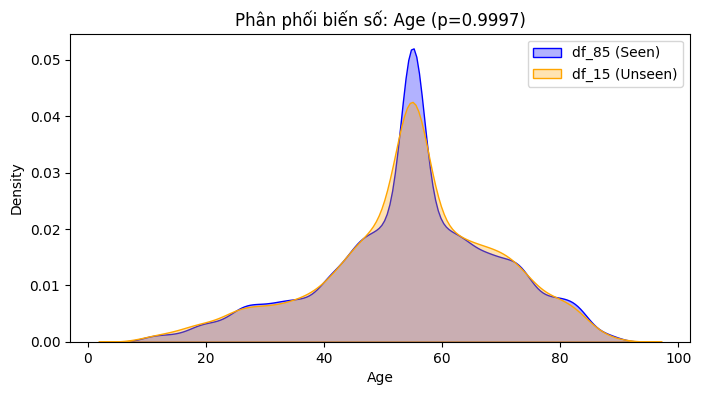

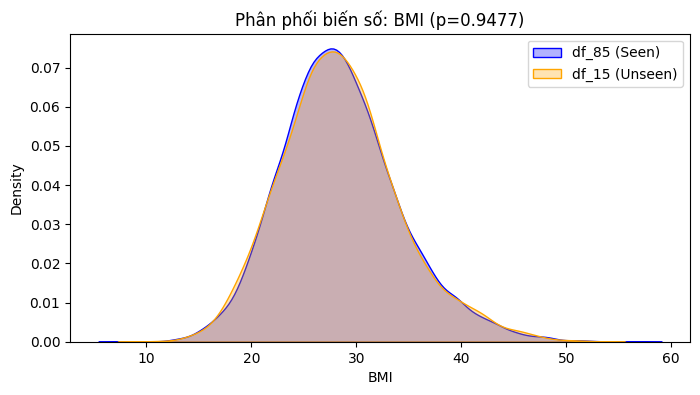

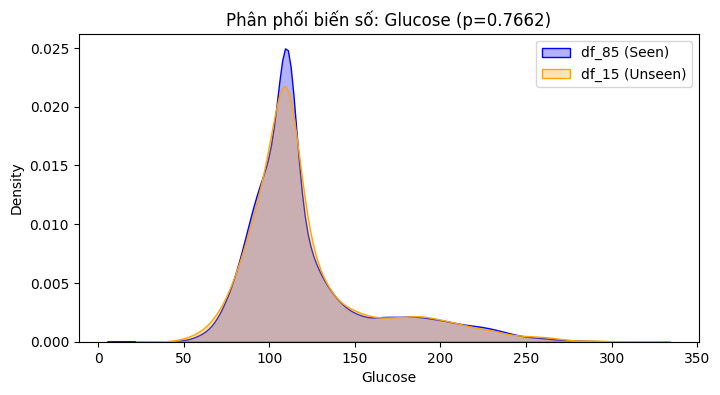

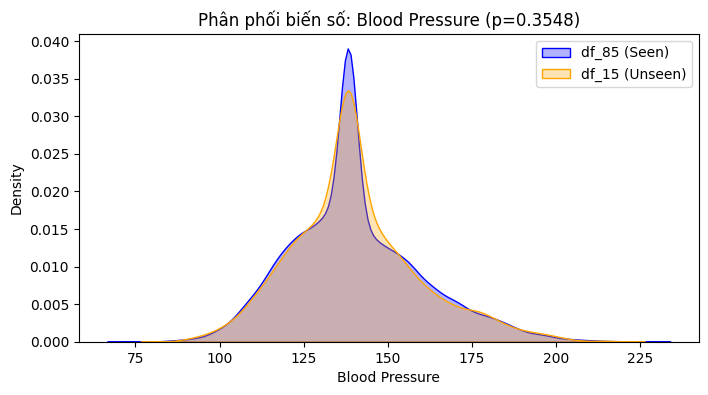

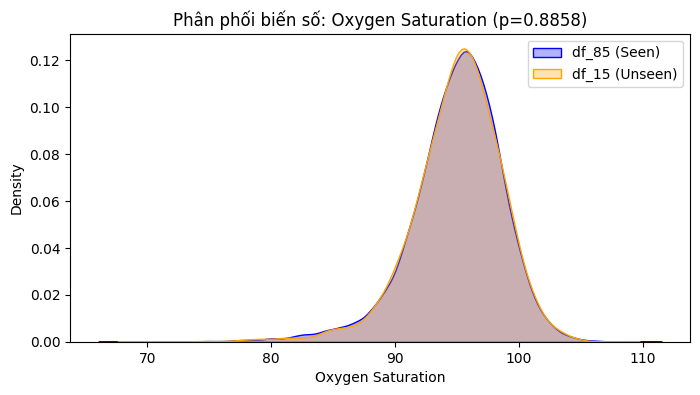

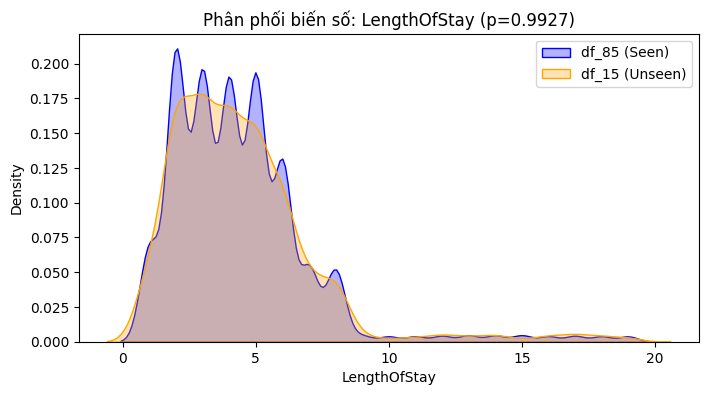

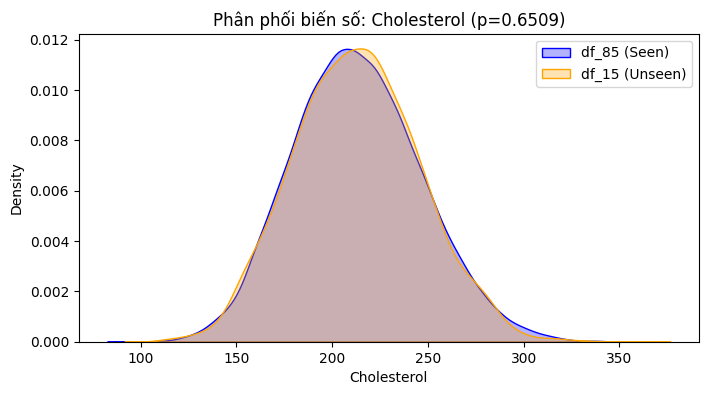

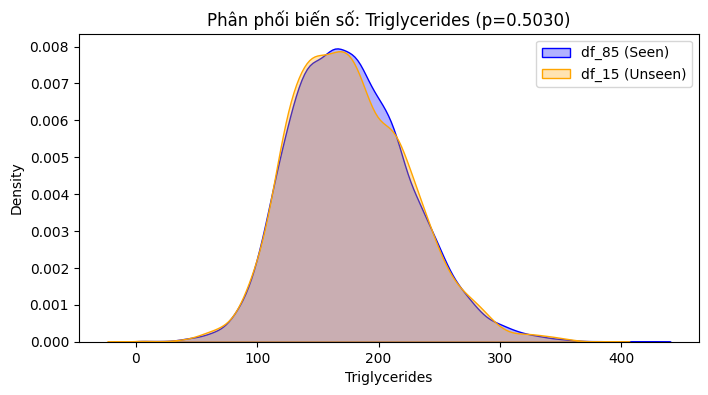

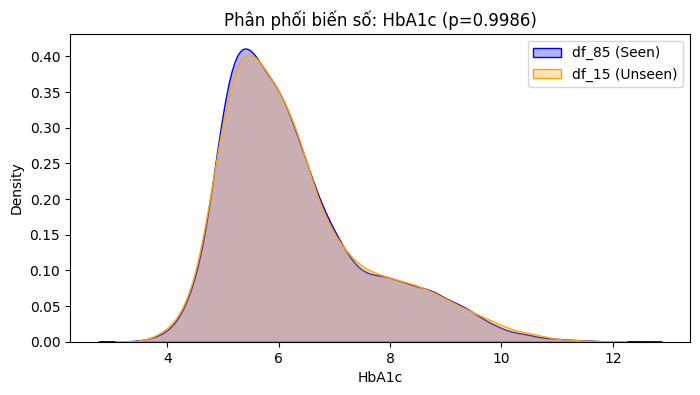

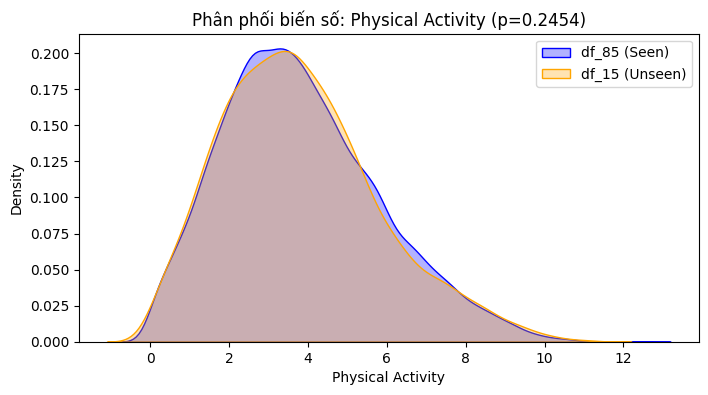

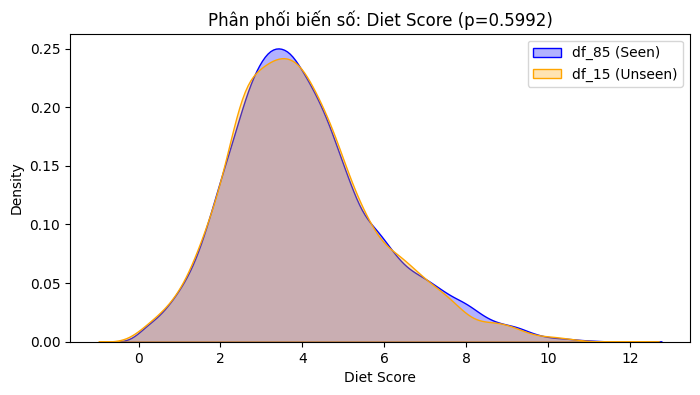

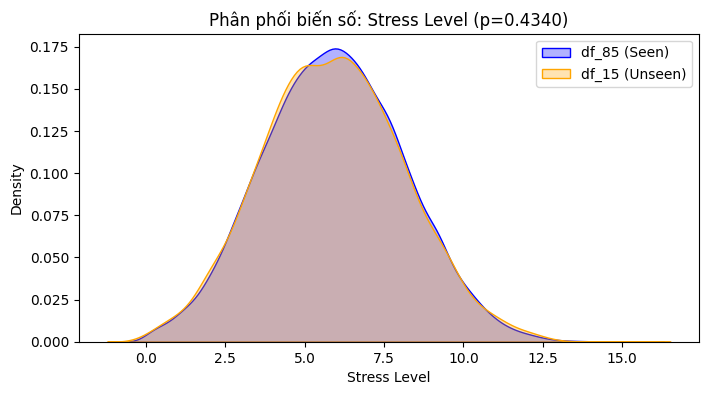

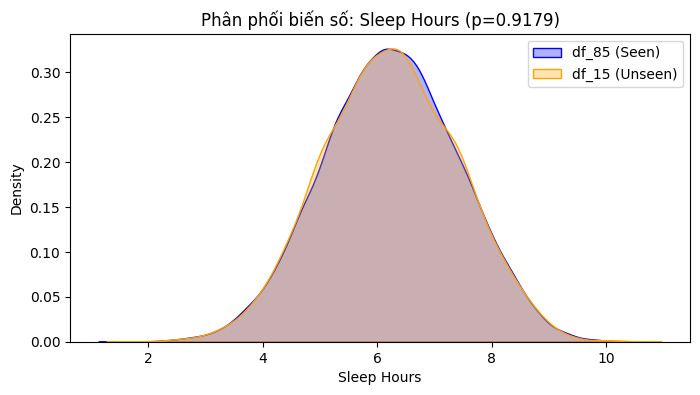

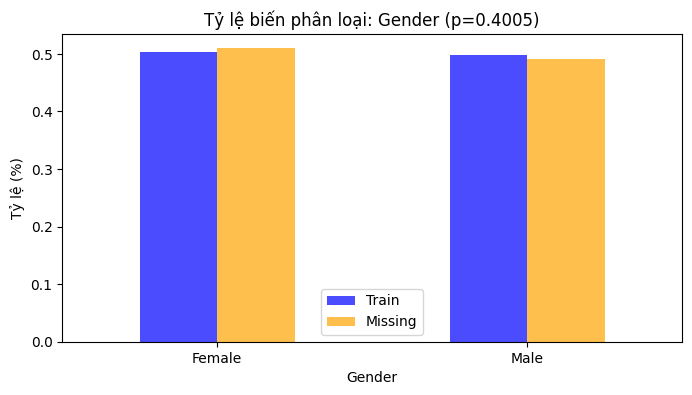

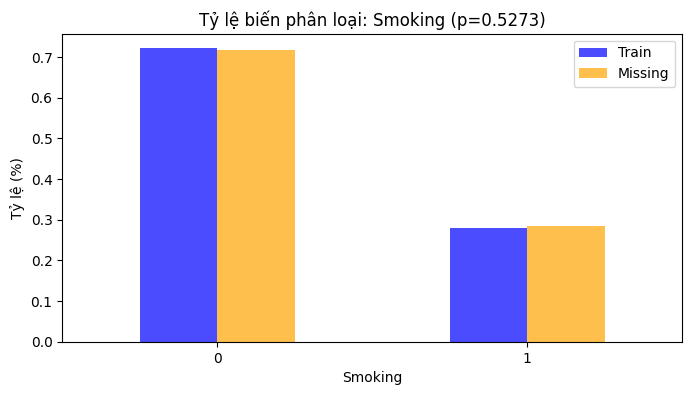

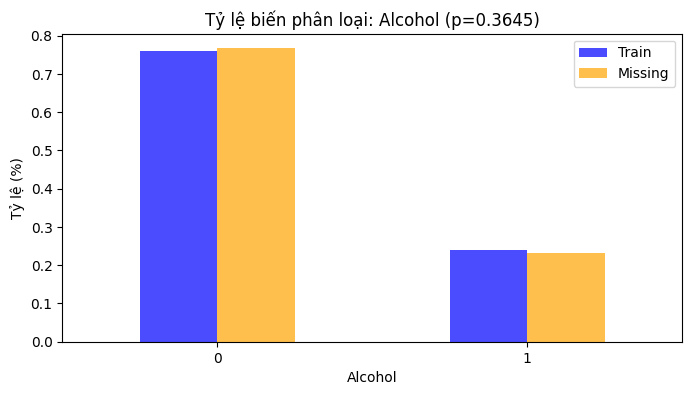

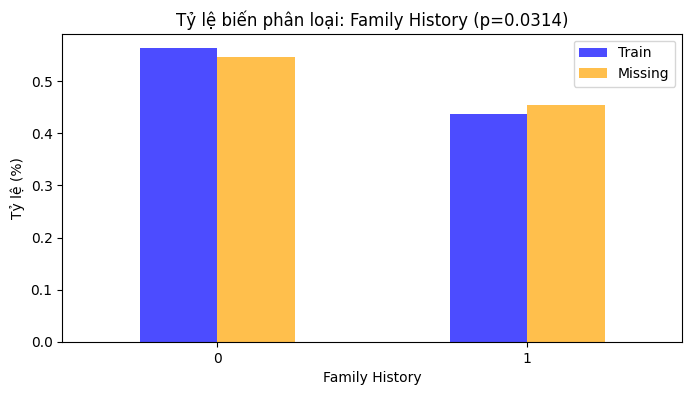


===== HOÀN TẤT KIỂM ĐỊNH =====



,Feature,Type,Test,P-Value,Conclusion (alpha=0.05)
0,Age,Numerical,KS Test,0.9997,Giống nhau
1,BMI,Numerical,KS Test,0.9477,Giống nhau
2,Glucose,Numerical,KS Test,0.7662,Giống nhau
3,Blood Pressure,Numerical,KS Test,0.3548,Giống nhau
4,Oxygen Saturation,Numerical,KS Test,0.8858,Giống nhau
5,LengthOfStay,Numerical,KS Test,0.9927,Giống nhau
6,Cholesterol,Numerical,KS Test,0.6509,Giống nhau
7,Triglycerides,Numerical,KS Test,0.5030,Giống nhau
8,HbA1c,Numerical,KS Test,0.9986,Giống nhau
9,Physical Activity,Numerical,KS Test,0.2454,Giống nhau


In [ ]:
categorical_cols = ['Gender', 'Smoking', 'Alcohol', 'Family History']
numeric_cols = ['Age', 'BMI', 'Glucose', 'Blood Pressure', 'Oxygen Saturation', 'LengthOfStay',
                'Cholesterol', 'Triglycerides', 'HbA1c', 'Physical Activity', 'Diet Score', 'Stress Level', 'Sleep Hours']
distribution_comparison.compare_distributions(numeric_cols, categorical_cols)

Như vậy, từ quá trình kiểm định phân phối cho thấy dữ liệu không có sự khác biệt đáng kể ở hai nhóm (ngoại trừ Family History, nhưng p-value không quá thấp và vẫn có thể bác bỏ nếu alpha = 0.01), củng cố lập luận rằng dữ liệu trống ngẫu nhiên (MCAR) và có thể tách các dòng có giá trị trống ở Medical Condition thành tập dữ liệu mô phỏng